In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder
from sklearn.feature_selection import RFE, mutual_info_regression
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor

In [4]:
DATA = pd.read_csv(r"./Processed_Flipdata.csv")

In [5]:
DATA.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [6]:
DATA.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [7]:
DATA.drop(columns = ['Unnamed: 0'], inplace=True)

In [8]:
DATA.info

<bound method DataFrame.info of                      Model          Colour  Memory  RAM  Battery_ Rear Camera  \
0          Infinix SMART 7     Night Black      64    4      6000        13MP   
1          Infinix SMART 7      Azure Blue      64    4      6000        13MP   
2             MOTOROLA G32    Mineral Gray     128    8      5000        50MP   
3                 POCO C50      Royal Blue      32    2      5000         8MP   
4          Infinix HOT 30i        Marigold     128    8      5000        50MP   
..                     ...             ...     ...  ...       ...         ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8      3900        50MP   
537               LAVA Z21            Cyan      32    2      3100         5MP   
538         Tecno Spark 8T  Turquoise Cyan      64    4      5000        50MP   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000        50MP   
540               OPPO A77        Sky Blue     128    4      5000        50MP

In [9]:
DATA.dtypes

Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object

In [10]:
DATA.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

There is no null Values in the Data set. So there is no need to handle null values in the Data set.

In [11]:
DATA.shape

(541, 11)

Did not give proper output for prize, so need to Clean and convert the prize column, because it converts ,

In [12]:
DATA['Prize'] = DATA['Prize'].replace(',', '', regex=True).astype(int)

In [13]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.6+ KB


In [14]:
DATA.head(5)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


Data Visulization according to its classification

In [15]:
# Data According to model's classification
data_ac_model = DATA.groupby('Model').agg({'Memory' : 'max',
                                            'RAM' : 'max',
                                            'Battery_' : 'max'}).reset_index()
data_ac_model

,Model,Memory,RAM,Battery_
0,APPLE iPhone 11,64,8,3110
1,APPLE iPhone 12,64,8,2815
2,APPLE iPhone 14 Plus,128,6,4323
3,Google Pixel 6a,128,8,4500
4,Google Pixel 7,128,8,4270
...,...,...,...,...
182,vivo Y33s,128,8,5000
183,vivo Y35,128,8,5000
184,vivo Y56 5G,128,8,5000
185,vivo Y565G,128,8,5000


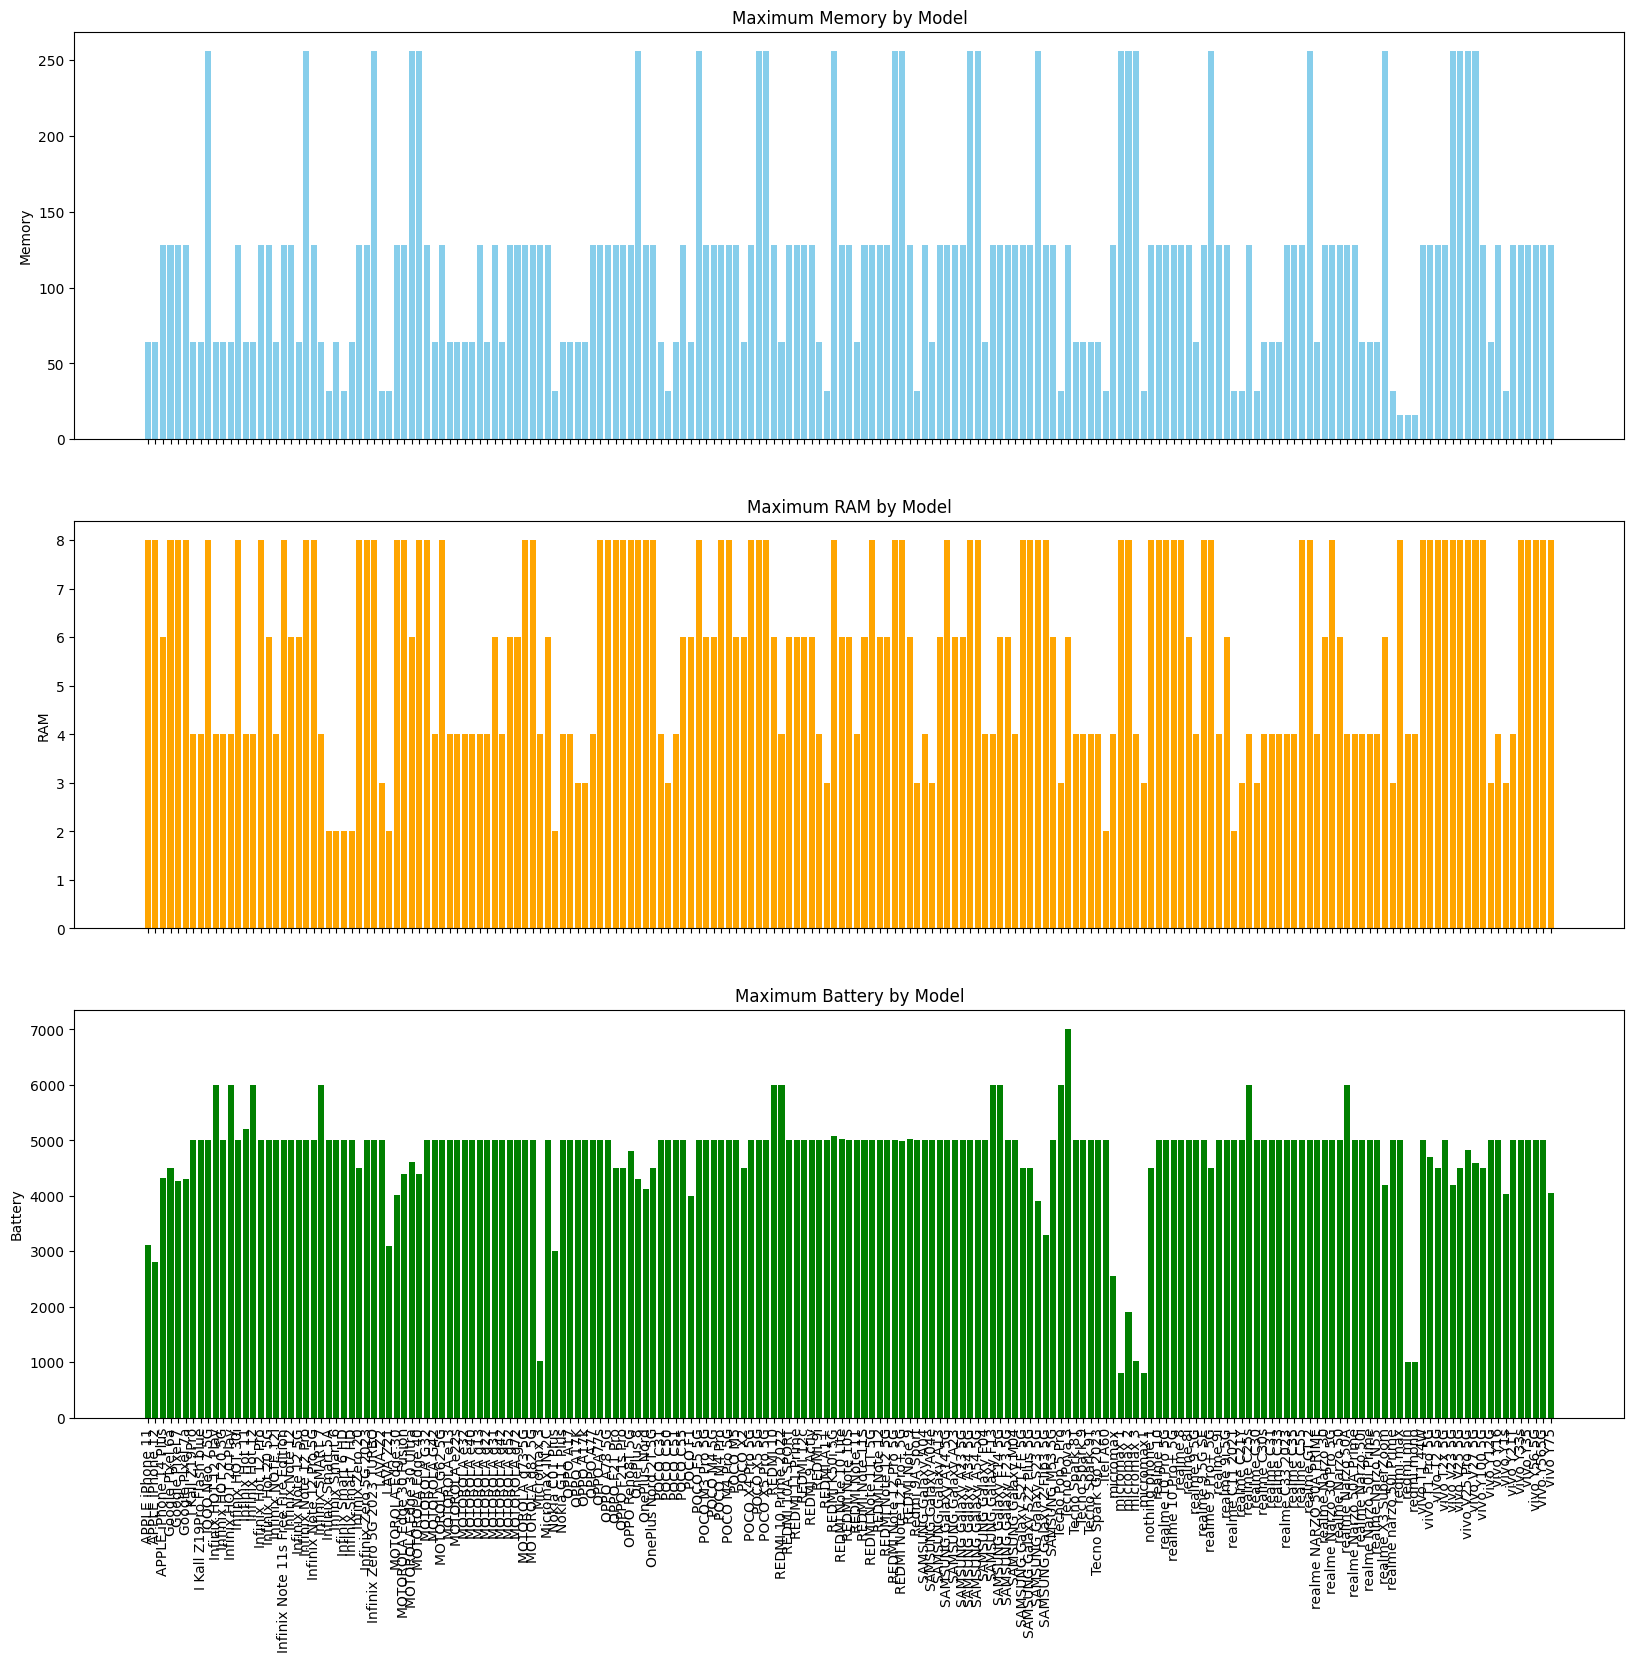

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(20, 18), sharex=True)

axes[0].bar(data_ac_model['Model'], data_ac_model['Memory'], color='skyblue')
axes[0].set_title('Maximum Memory by Model')
axes[0].set_ylabel('Memory')

axes[1].bar(data_ac_model['Model'], data_ac_model['RAM'], color='orange')
axes[1].set_title('Maximum RAM by Model')
axes[1].set_ylabel('RAM')

axes[2].bar(data_ac_model['Model'], data_ac_model['Battery_'], color='green')
axes[2].set_title('Maximum Battery by Model')
axes[2].set_ylabel('Battery')

plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()



In [17]:
# Sort the data according to Model's camera feature
model_ac_camera_feature = DATA.groupby('Model').agg({'Front Camera' : 'max',
                                            'Rear Camera' : 'max'}).reset_index()
model_ac_camera_feature

,Model,Front Camera,Rear Camera
0,APPLE iPhone 11,12MP,12MP
1,APPLE iPhone 12,12MP,12MP
2,APPLE iPhone 14 Plus,12MP,12MP
3,Google Pixel 6a,8MP,50MP
4,Google Pixel 7,8MP,50MP
...,...,...,...
182,vivo Y33s,16MP,50MP
183,vivo Y35,16MP,50MP
184,vivo Y56 5G,16MP,50MP
185,vivo Y565G,16MP,50MP


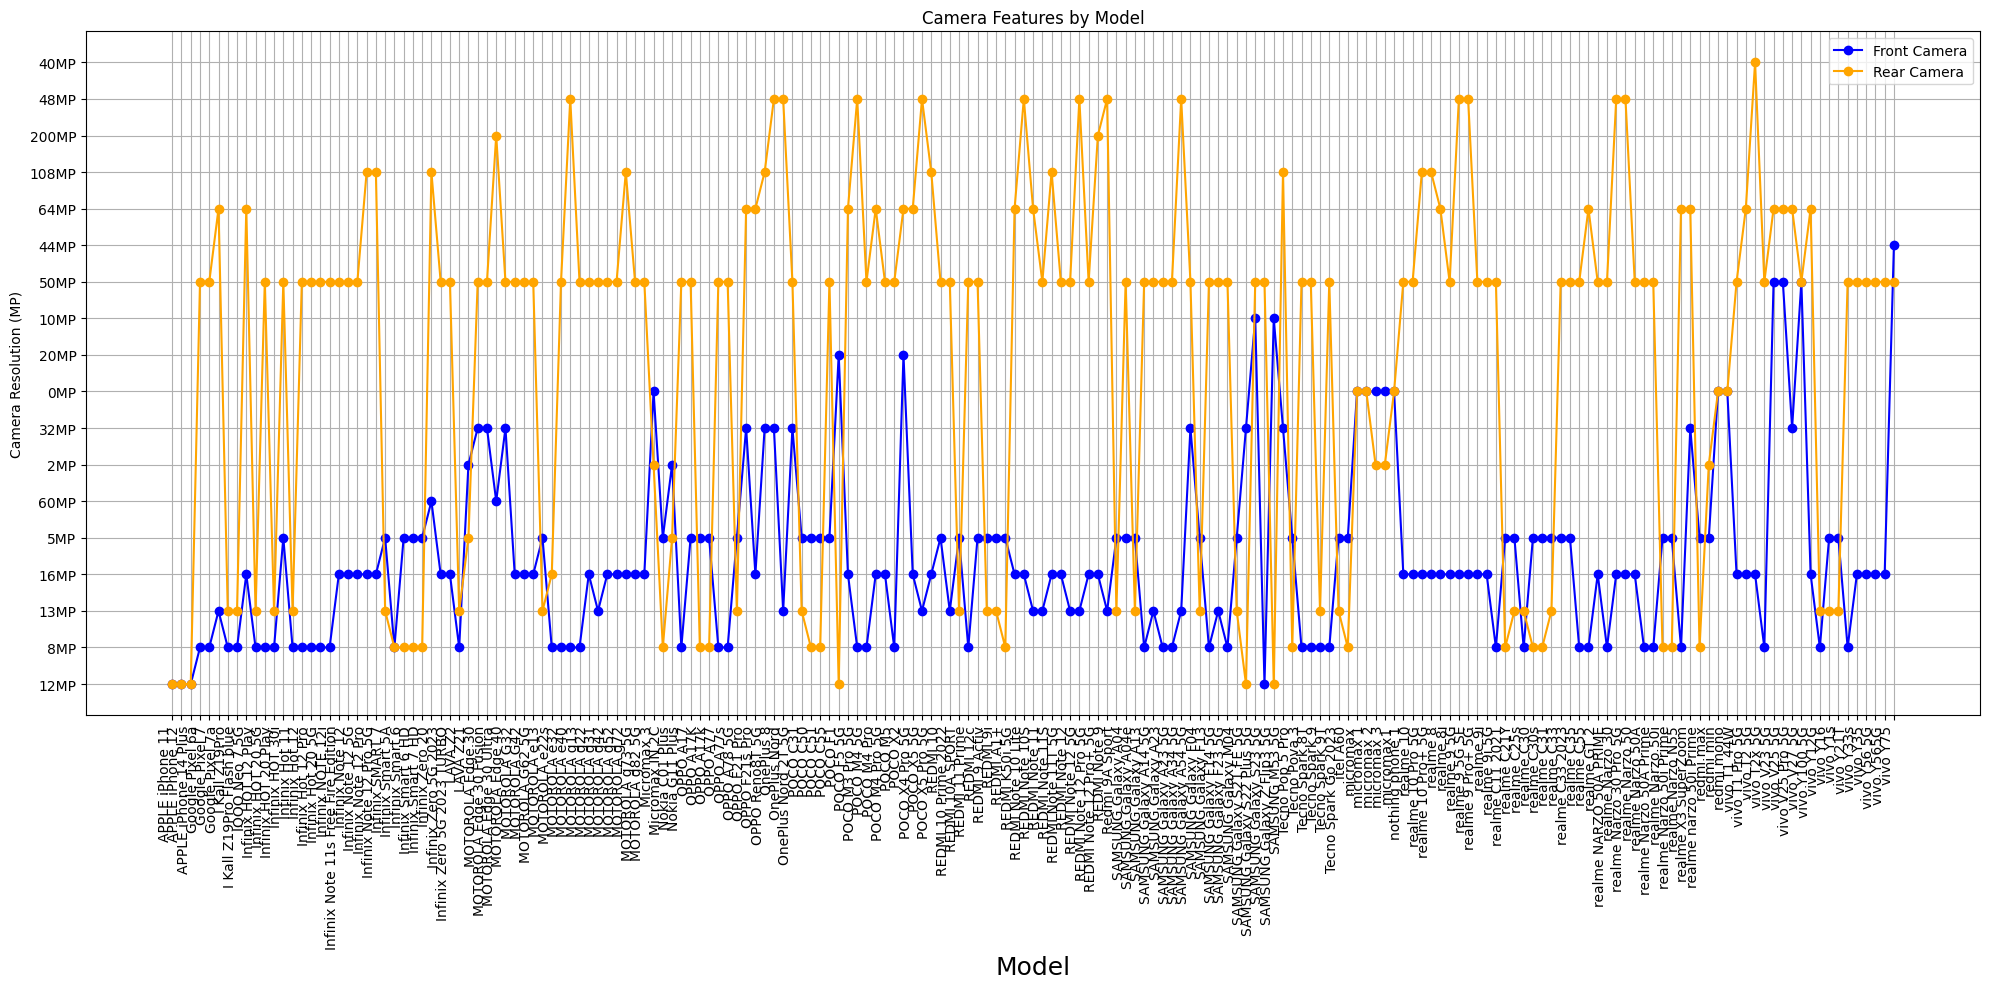

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(model_ac_camera_feature['Model'], model_ac_camera_feature['Front Camera'], marker='o', label='Front Camera', color='blue')
plt.plot(model_ac_camera_feature['Model'], model_ac_camera_feature['Rear Camera'], marker='o', label='Rear Camera', color='orange')

plt.title('Camera Features by Model')
plt.xlabel('Model', fontsize=18)
plt.ylabel('Camera Resolution (MP)')
plt.xticks(rotation=90, ha='right')  # Rotate model labels for clarity
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Particular model with the most frequent processor

In [19]:
def most_frequent(series):
    return series.mode()[0] if not series.mode().empty else None

data_ac_model_processor = DATA.groupby('Model').agg({'Processor_' : most_frequent}).reset_index()
data_ac_model_processor

,Model,Processor_
0,APPLE iPhone 11,ios
1,APPLE iPhone 12,ios
2,APPLE iPhone 14 Plus,6 Core
3,Google Pixel 6a,Google Tensor
4,Google Pixel 7,Google Tensor G2
...,...,...
182,vivo Y33s,MediaTek Helio G80
183,vivo Y35,Qualcomm Snapdragon 680
184,vivo Y56 5G,Mediatek Dimensity 700
185,vivo Y565G,MTK Dimensity 700


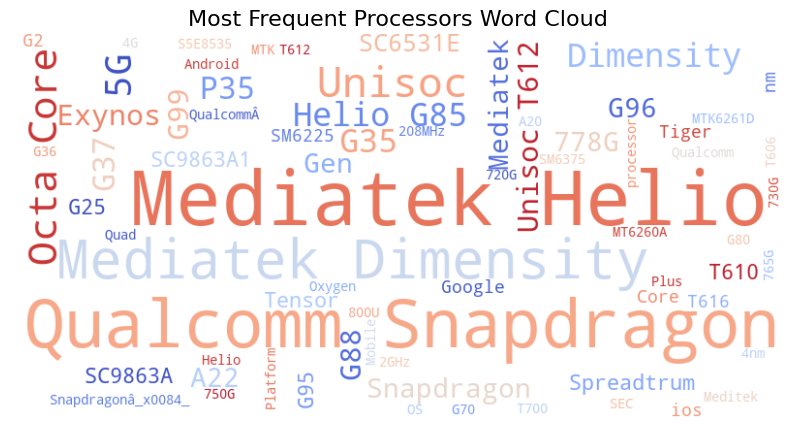

In [20]:
from wordcloud import WordCloud

# Prepare data for word cloud
processor_text = ' '.join(data_ac_model_processor['Processor_'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(processor_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Processors Word Cloud', fontsize=16)
plt.show()






In [21]:
data_ac_model_with_higest_price = DATA.groupby('Model').agg({'Prize' : 'max'}).reset_index()
data_ac_model_with_higest_price = data_ac_model_with_higest_price.sort_values(by = 'Prize', ascending= False)
data_ac_model_with_higest_price

,Model,Prize
2,APPLE iPhone 14 Plus,80999
118,SAMSUNG Galaxy S23 5G,79999
4,Google Pixel 7,55999
1,APPLE iPhone 12,53999
35,MOTOROLA Edge 30 Ultra,49999
...,...,...
168,redmi mono,1699
132,micromax1,1599
128,micromax,1422
129,micromax 1,1299


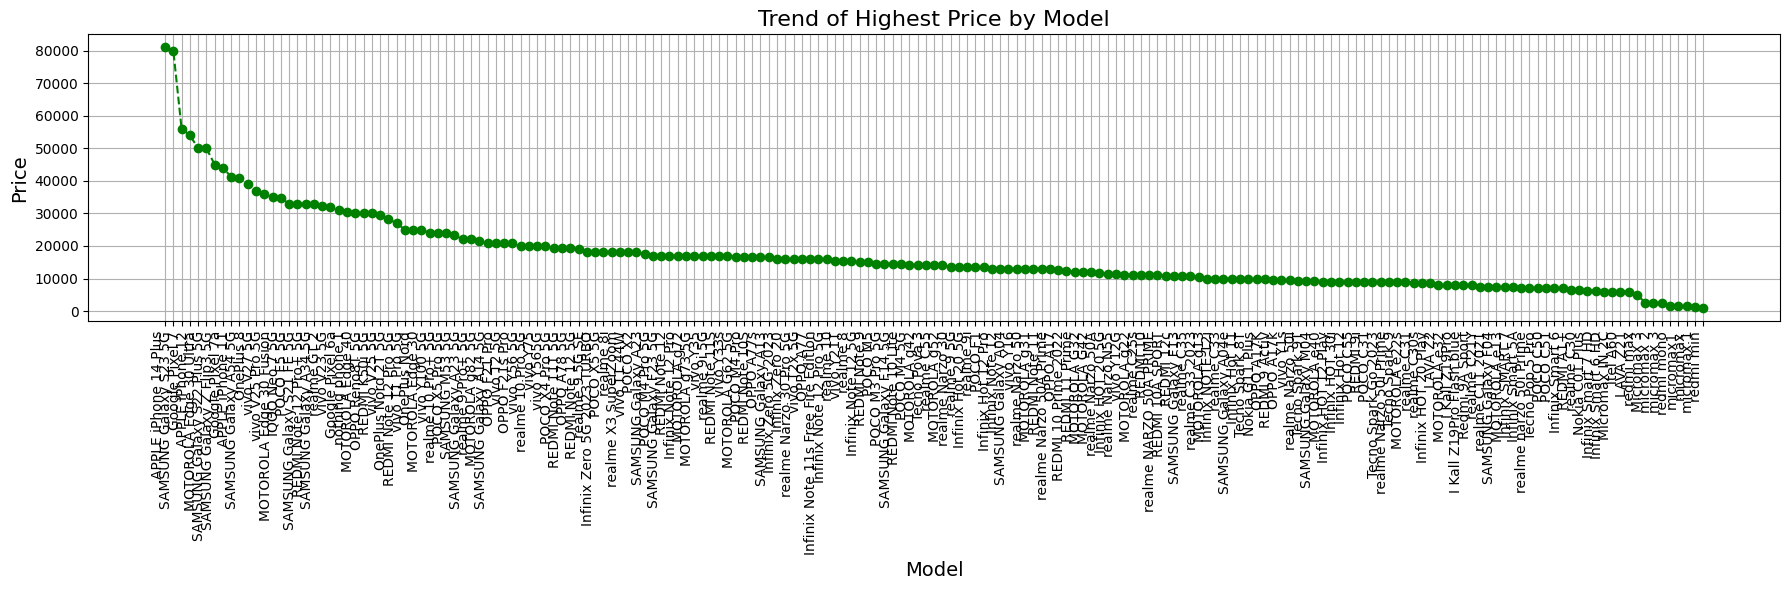

In [22]:
# Create the line plot
plt.figure(figsize=(18, 6))
models = data_ac_model_with_higest_price['Model']
prices = data_ac_model_with_higest_price['Prize']
plt.plot(models, prices, marker='o', color='green', linestyle='--')

# Customize the plot
plt.title('Trend of Highest Price by Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.tight_layout()

plt.show()



In [23]:
data_ac_model_with_higest_price = data_ac_model_with_higest_price.reset_index(drop=True)

In [24]:
data_ac_model_with_higest_price.head()

,Model,Prize
0,APPLE iPhone 14 Plus,80999
1,SAMSUNG Galaxy S23 5G,79999
2,Google Pixel 7,55999
3,APPLE iPhone 12,53999
4,MOTOROLA Edge 30 Ultra,49999


In [25]:
grouped_data_ac_model_color = DATA.groupby(['Model', 'Colour']).agg({'Prize': 'max'}).reset_index()

grouped_data_ac_model_color

,Model,Colour,Prize
0,APPLE iPhone 11,Black,41199
1,APPLE iPhone 12,Blue,53999
2,APPLE iPhone 14 Plus,Midnight,80999
3,APPLE iPhone 14 Plus,Purple,80999
4,APPLE iPhone 14 Plus,Starlight,80999
...,...,...,...
381,vivo Y56 5G,Black Engine,19999
382,vivo Y56 5G,Orange Shimmer,19999
383,vivo Y565G,Orange Shimmer,19979
384,vivo Y75,Dancing waves,19990


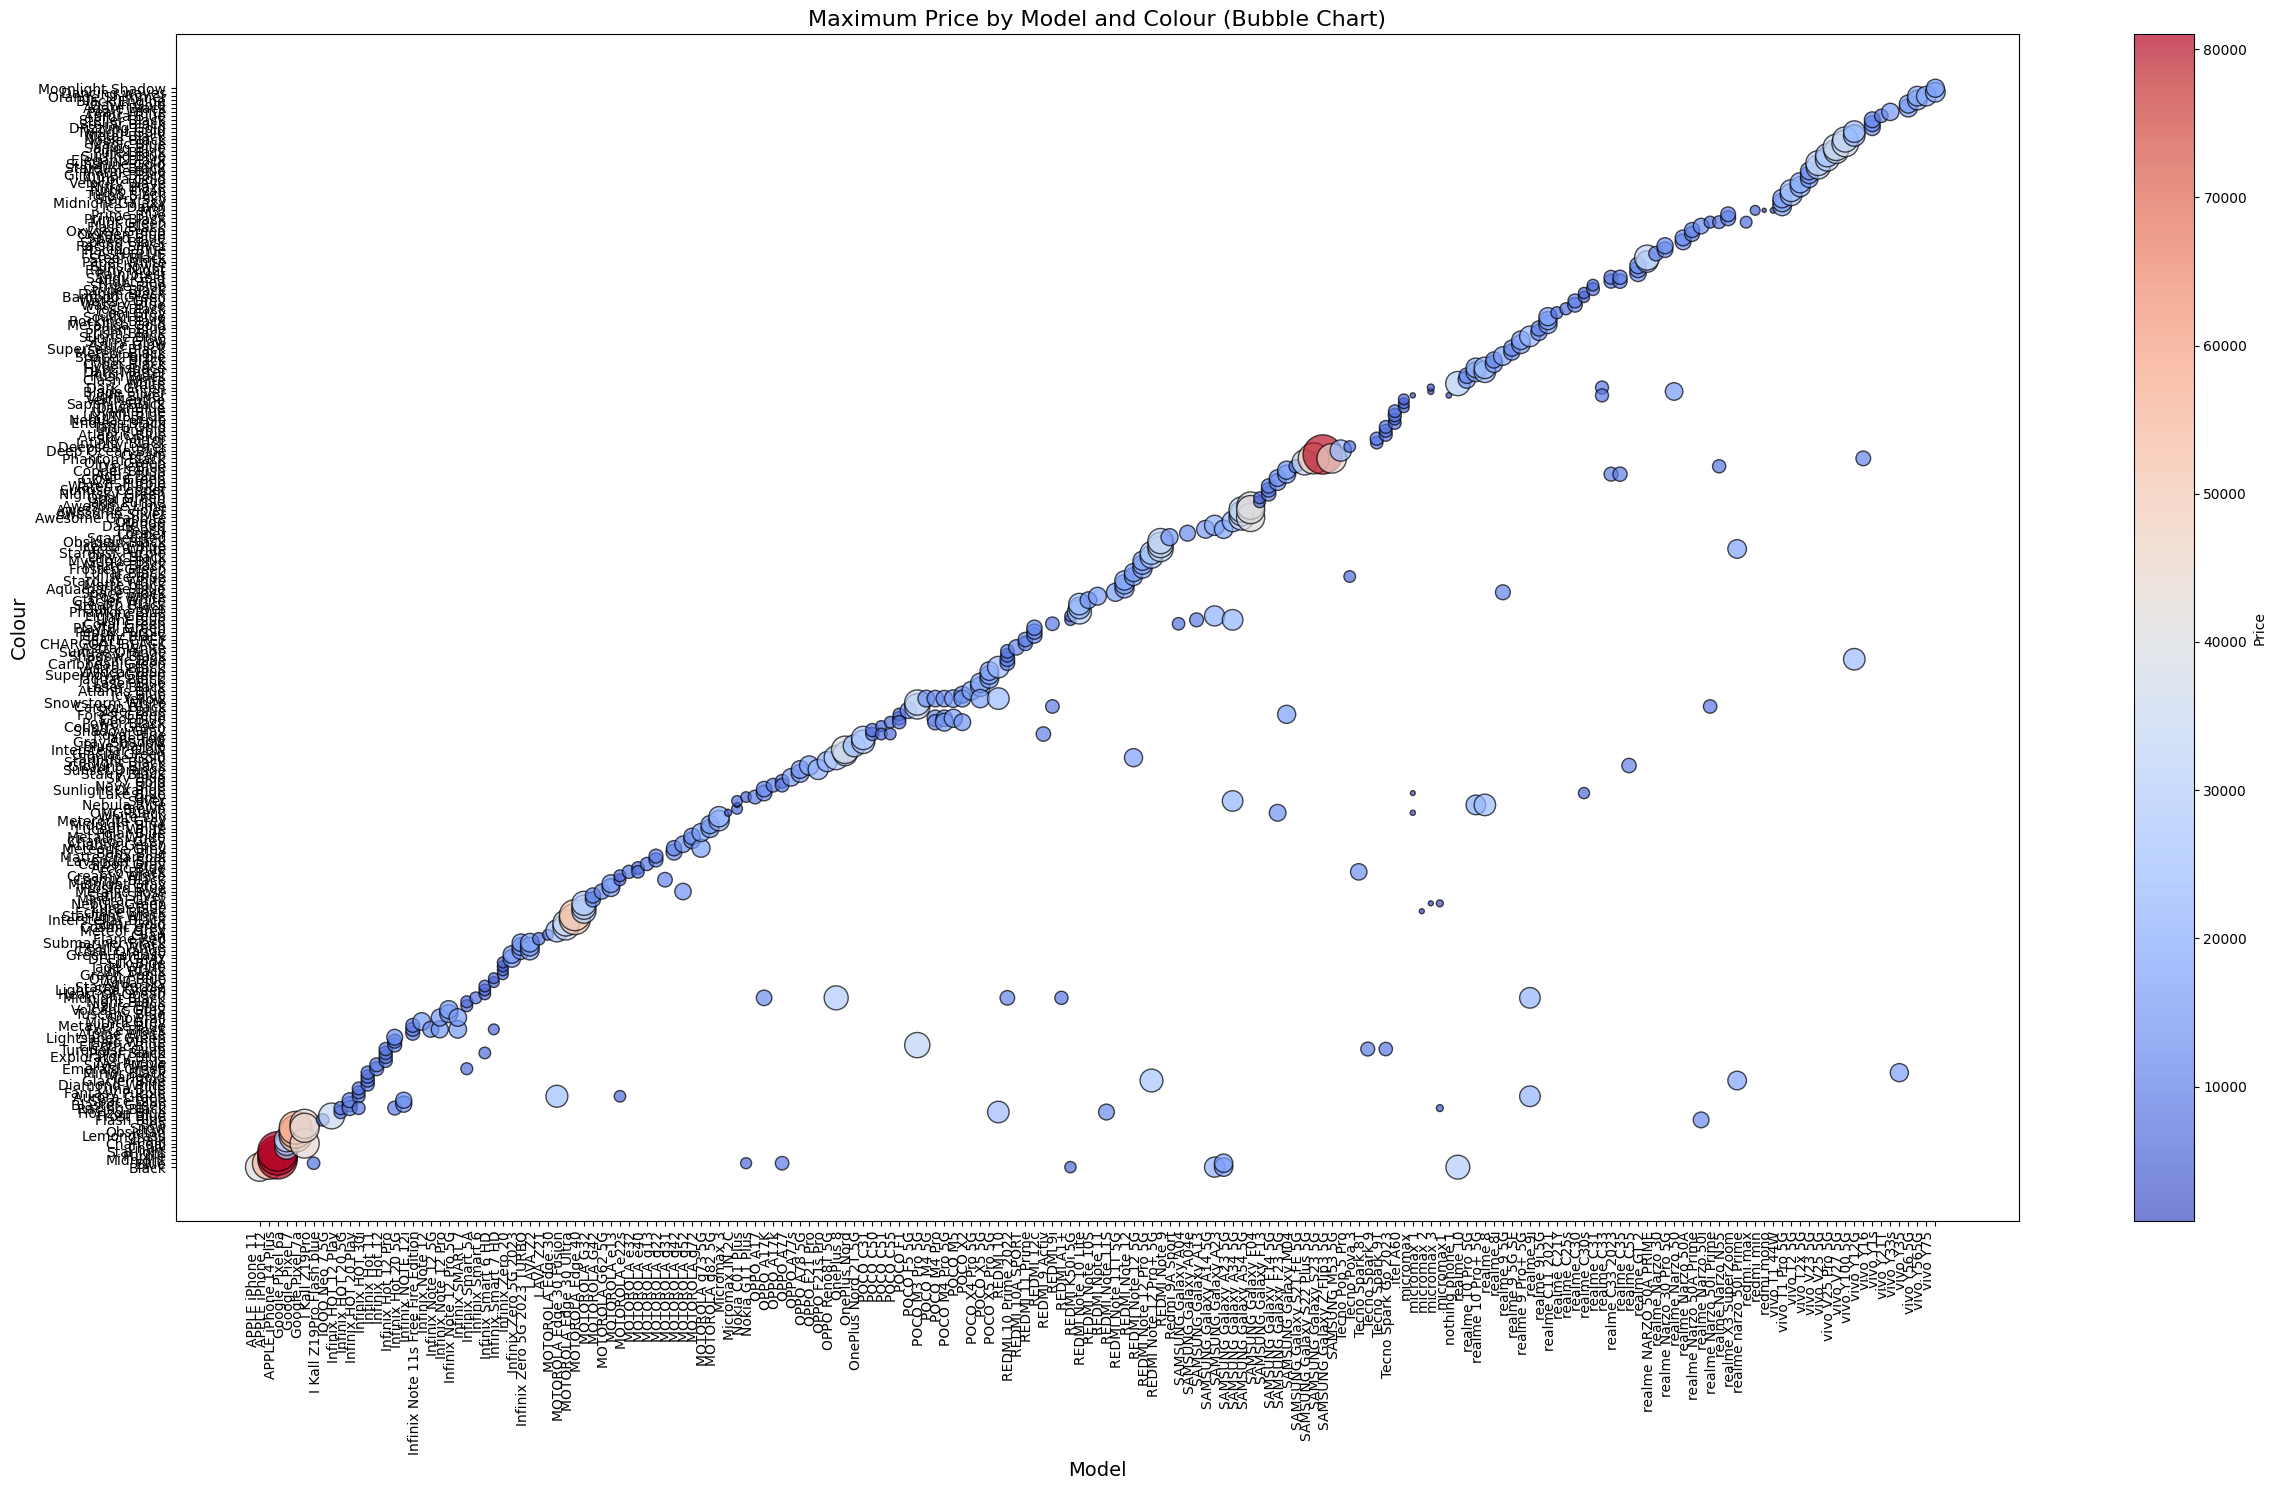

In [26]:
models = grouped_data_ac_model_color['Model']
colors = grouped_data_ac_model_color['Colour']
prices = grouped_data_ac_model_color['Prize']

plt.figure(figsize=(25, 15))
plt.scatter(models, colors, s=prices / 100, c=prices, cmap='coolwarm', alpha=0.7, edgecolors='black')

plt.title('Maximum Price by Model and Colour (Bubble Chart)', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Colour', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.colorbar(label='Price')
plt.tight_layout()

plt.show()


Find the Coninues and Categorial Features.

In [27]:
# To get Continues and Categorical Data Columns from the Data Set
def get_continues_categorical_data_columns(data_set):
    continues_data_list = []
    categorical_data_list = []
    for col in DATA.columns:
        if DATA[col].dtypes == 'object':
            categorical_data_list.append(col)
        else:
            continues_data_list.append(col)
    return continues_data_list,categorical_data_list

continues_data_list, categorical_data_list = get_continues_categorical_data_columns(DATA)

In [28]:
print(f"Continues data list : {continues_data_list}")
print(f"Categorical data list : {categorical_data_list}")

Continues data list : ['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize']
Categorical data list : ['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_']


Find and Visulize the correaltion among the Continues Data List 

In [29]:
correlation_status = DATA[continues_data_list].corr()
correlation_status

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
Memory,1.000000,0.625284,-0.053210,-0.094442,0.063163,0.566660
RAM,0.625284,1.000000,-0.104923,-0.082622,0.092951,0.532024
Battery_,-0.053210,-0.104923,1.000000,0.150156,0.695641,-0.034297
AI Lens,-0.094442,-0.082622,0.150156,1.000000,0.052018,-0.153691
Mobile Height,0.063163,0.092951,0.695641,0.052018,1.000000,0.176009
Prize,0.566660,0.532024,-0.034297,-0.153691,0.176009,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Memory'),
  Text(0, 1.5, 'RAM'),
  Text(0, 2.5, 'Battery_'),
  Text(0, 3.5, 'AI Lens'),
  Text(0, 4.5, 'Mobile Height'),
  Text(0, 5.5, 'Prize')])

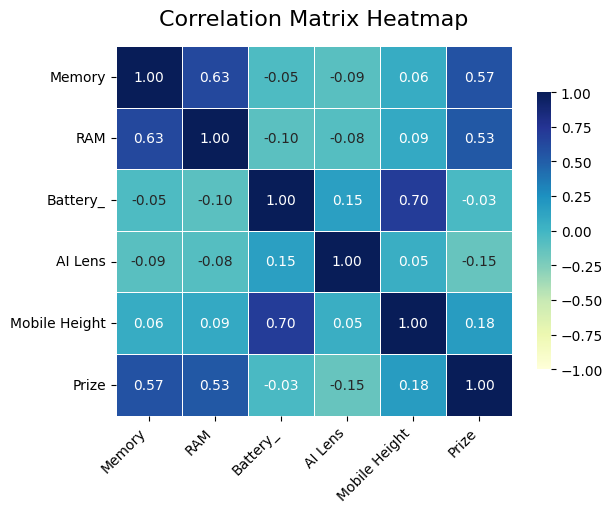

In [30]:
# Create the heatmap
sns.heatmap(
    correlation_status,
    annot=True,          # Show correlation values in the cells
    fmt=".2f",           # Format the numbers to 2 decimal places
    cmap="YlGnBu",     # Color map for a visually appealing style
    vmin=-1, vmax=1,     # Range of correlation values
    linewidths=0.5,      # Add space between cells
    cbar_kws={"shrink": 0.75},  # Shrink the color bar
)

# Add title and labels
plt.title("Correlation Matrix Heatmap", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)

There is a strong positive relation between Prize, Memory and RAM.
As Memory and RAM increase Prize will also increase.

Outlier Check for different datapoints.

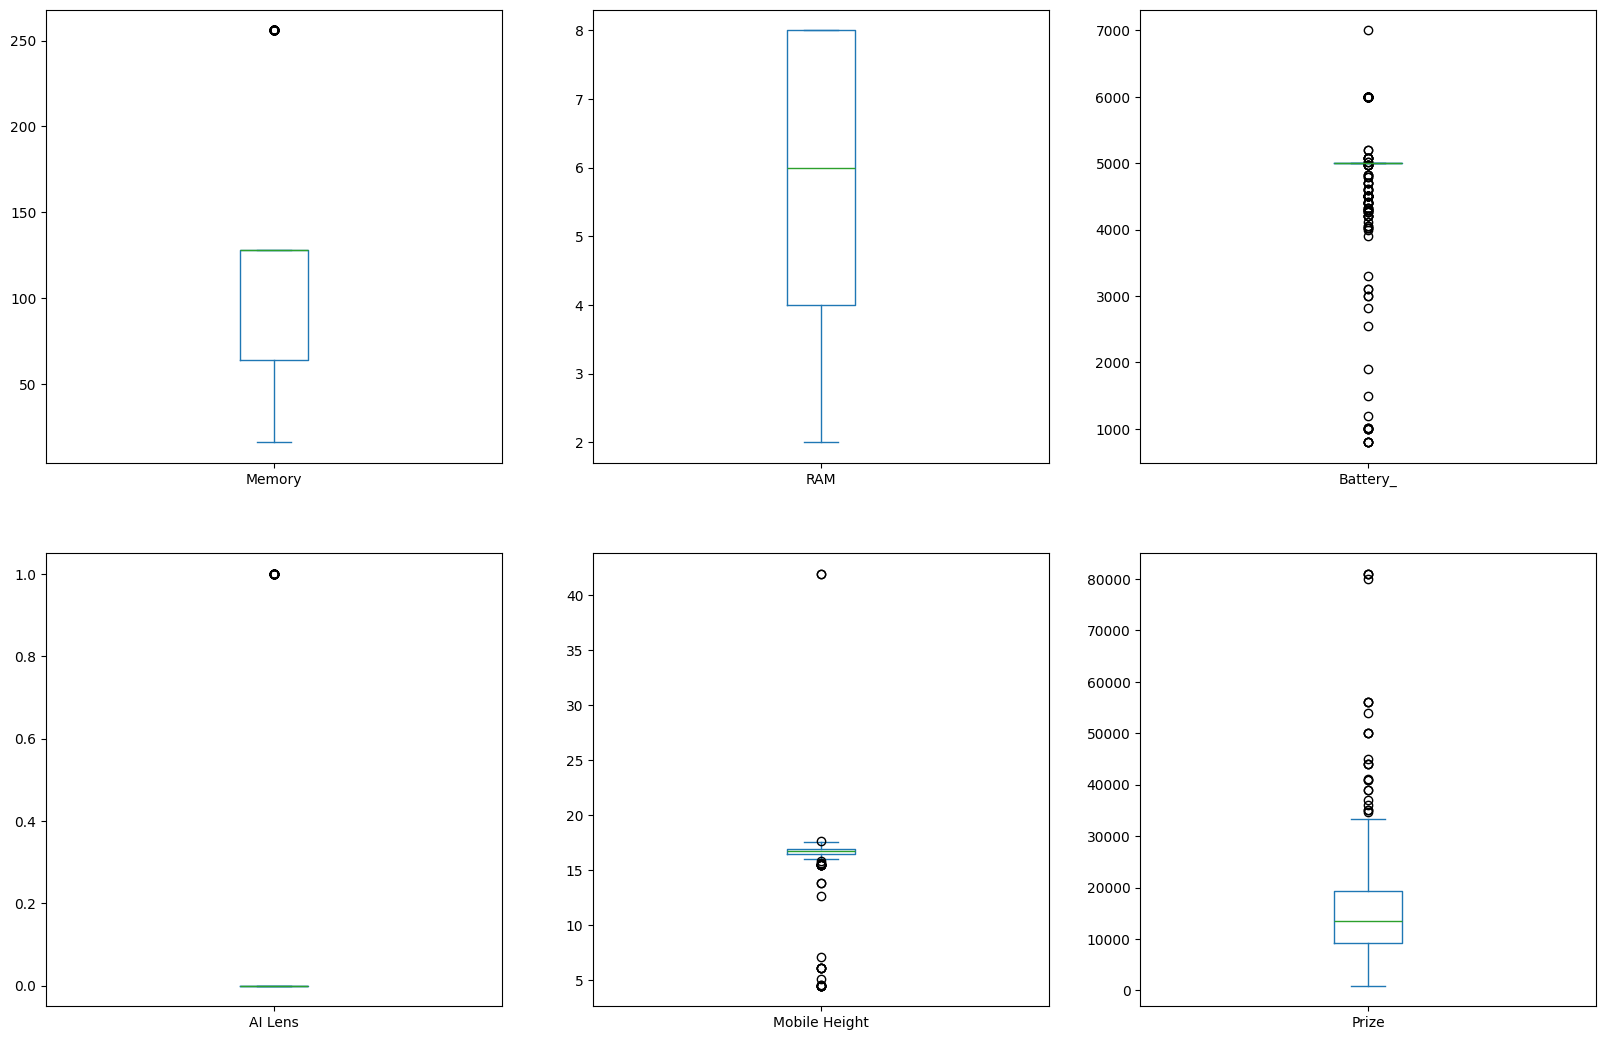

In [31]:
DATA[continues_data_list].plot(kind='box',subplots=True , layout=(3,3), figsize=(20,20))
plt.show()

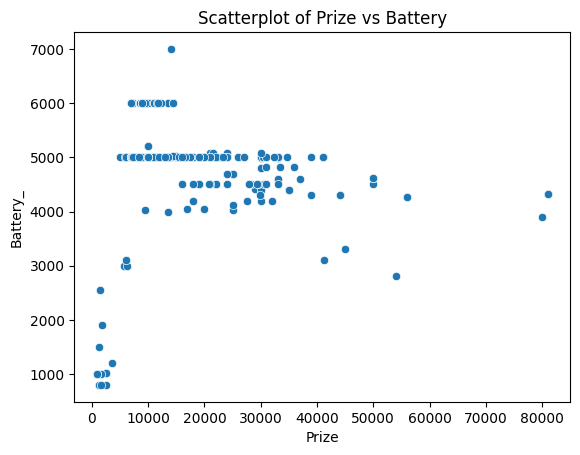

In [32]:
sns.scatterplot(data=DATA, x='Prize', y='Battery_')
plt.title('Scatterplot of Prize vs Battery')
plt.show()

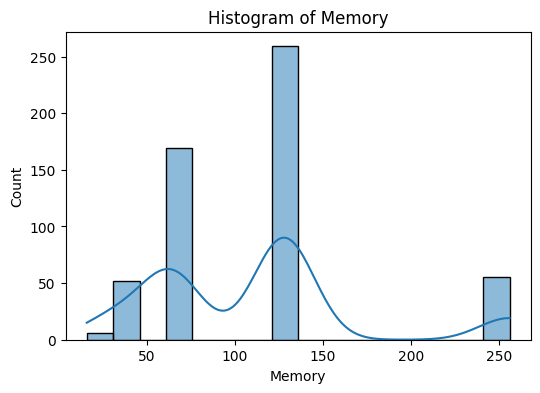

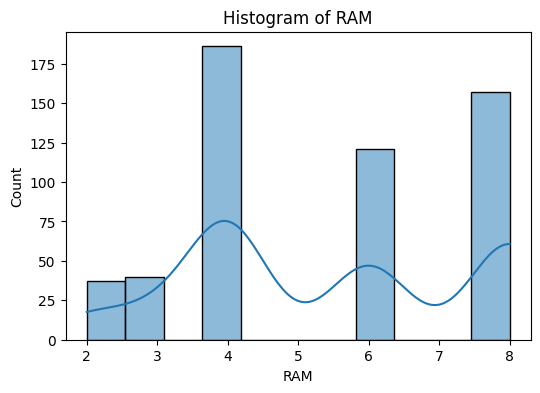

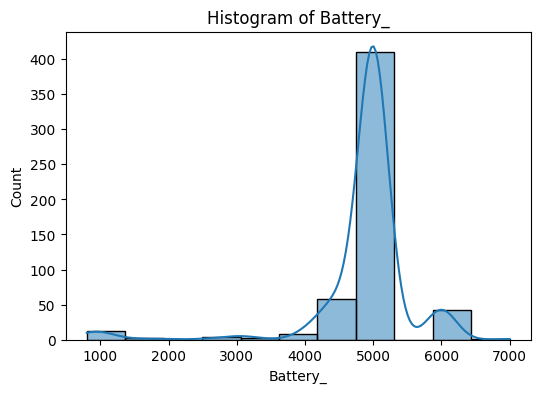

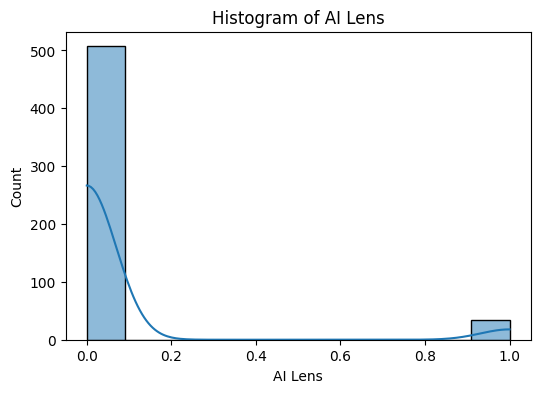

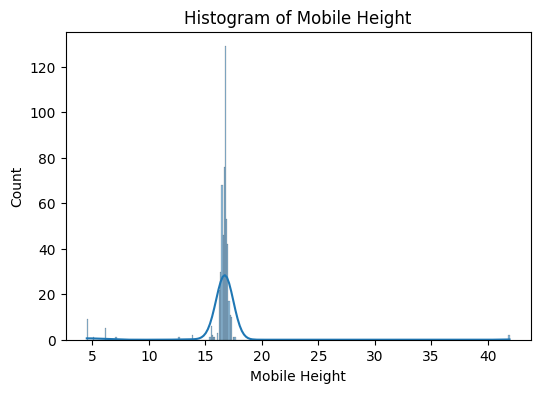

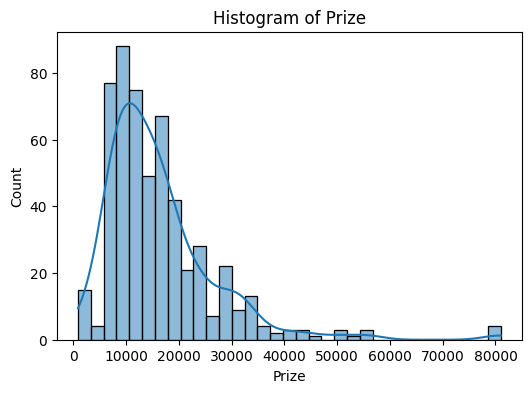

In [33]:
for col in continues_data_list:
    plt.figure(figsize=(6, 4))
    sns.histplot(DATA[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------

Outlier Detection with use of Z-score method

In [34]:
from scipy.stats import zscore

# Compute Z-scores
z_scores = DATA[continues_data_list].apply(zscore)

# Filter outliers (Z > 3 or Z < -3)
outliers_z = DATA[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print("Outliers detected using Z-score method:")
outliers_z

Outliers detected using Z-score method:


,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
5,Infinix HOT 30i,Glacier Blue,128,8,5000,50MP,5MP,1,16.76,G37,8999
6,Infinix HOT 30i,Mirror Black,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
500,Infinix Note 12 Pro,Volcanic Grey,256,8,5000,108MP,16MP,1,17.02,Mediatek Helio G99,16999
520,APPLE iPhone 14 Plus,Purple,128,3,4323,12MP,12MP,0,17.02,6 Core,80999
525,APPLE iPhone 14 Plus,Starlight,128,4,4323,12MP,12MP,0,17.02,ios,80999
532,APPLE iPhone 12,Blue,64,8,2815,12MP,12MP,0,15.49,ios,53999


In [35]:
# Identify outliers using Z-scores
outliers = np.abs(zscore(DATA[continues_data_list])) > 3  # Typically use 3 as the threshold
outlier_indices = np.any(outliers, axis=1)  # Get indices of rows that are outliers
DATA[outlier_indices]

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
5,Infinix HOT 30i,Glacier Blue,128,8,5000,50MP,5MP,1,16.76,G37,8999
6,Infinix HOT 30i,Mirror Black,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
500,Infinix Note 12 Pro,Volcanic Grey,256,8,5000,108MP,16MP,1,17.02,Mediatek Helio G99,16999
520,APPLE iPhone 14 Plus,Purple,128,3,4323,12MP,12MP,0,17.02,6 Core,80999
525,APPLE iPhone 14 Plus,Starlight,128,4,4323,12MP,12MP,0,17.02,ios,80999
532,APPLE iPhone 12,Blue,64,8,2815,12MP,12MP,0,15.49,ios,53999


In [36]:
DATA['Is_Outlier'] = outlier_indices

Except remove the outlier, segement the data into normal and outlier group.So no data should alter and if there is a special category that should treated differently.

In [37]:
outliers_data = DATA[outlier_indices]
normal_data = DATA[~outlier_indices] 

In [38]:
model_normal = LogisticRegression()
model_normal.fit(normal_data[continues_data_list], normal_data['Prize'])

model_outliers = KMeans(n_clusters=2)  # Assuming outliers form distinct clusters
model_outliers.fit(outliers_data[continues_data_list])

d:\Data_Science_by_Digicrome\Internship\Machine_Learning_project\Project_4\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KMeans(n_clusters=2)

Before fitting the Logistic Regression model, scale the features using a standard scaler. This ensures that all features have a similar scale, making the optimization process more effective.

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features_normal = scaler.fit_transform(normal_data[continues_data_list])
model_normal.fit(scaled_features_normal, normal_data['Prize'])

scaled_features_outlier_data = scaler.fit_transform(outliers_data[continues_data_list])
model_outliers.fit(scaled_features_outlier_data, outliers_data['Prize'])

KMeans(n_clusters=2)

In [40]:
normal_data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize',
       'Is_Outlier'],
      dtype='object')

In [41]:
normal_data['Colour'].unique()

array(['Mineral Gray', 'Royal Blue', 'Shadow Black', 'Waterfall Blue',
       'Opal Green', 'Power Black', 'Country Green', 'Cosmic Black',
       'Aurora Gold', 'Marine Blue', 'Glimmer Black', 'Black',
       'Light Blue', 'Light Green', 'Cool Blue', 'Forest Green',
       'Nightsky Green', 'Matte Charcoal', 'Eco Black', 'Caribbean Green',
       'Jade Purple', 'Satin Silver', 'Sunrise Orange', 'Sunrise Copper',
       'Arctic Blue', 'Lavender Blue', 'Velocity Wave', 'Nitro Blaze',
       'Frosted Blue', 'Yellow', 'Midnight Gray', 'Creamy White',
       'Sandy Gold', 'Aqua Blue', 'GOAT Green', 'Midnight Blue',
       'Night Sea', 'Bamboo Green', 'Lake Blue', 'Denim Black',
       'Wildcat Blue', 'Icy Blue', 'Flashy Black', 'Sunshower',
       'Rainy Night', 'Rainforest', 'B.A.E. Purple', 'Peppy Purple',
       'Lucent White', 'Dark Matter', 'Nebula Blue', 'Hyperspace',
       'Blade Silver', 'Force Black', 'Snowfall', 'Supernova Green',
       'Pacific Blue', 'OMG Black', 'Eclipse Bla

In [182]:
normal_data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize',
       'Is_Outlier'],
      dtype='object')

In [183]:
normal_data.head(5)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Is_Outlier
2,MOTOROLA G32,Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999,False
3,POCO C50,Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649,False
10,REDMI 10,Black,64,4,6000,50MP,5MP,0,17.02,Qualcomm Snapdragon 680,9499,False
13,SAMSUNG Galaxy F13,Blue,128,4,6000,50MP,8MP,0,16.76,Exynos 850,10699,False
14,SAMSUNG Galaxy F04,Green,64,4,5000,13MP,5MP,0,16.51,Mediatek Helio P35,7299,False


In [ ]:
normal_data['Colour'].value_counts()

Colour
Yellow             12
Power Black         8
Royal Blue          8
Black               8
Cool Blue           7
                   ..
Copper              1
Starlight Black     1
Cyan                1
Awesome Lime        1
Sky Blue            1
Name: count, Length: 251, dtype: int64

There are so many colors in the Color feature, so make it as one perticular color.

In [43]:
def categorize_colors(color):
    if "Black" in color:
        return "Black"
    elif "Blue" in color:
        return "Blue"
    elif "Green" in color:
        return "Green"
    elif "White" in color:
        return "White"
    elif "Gray" in color or "Grey" in color:
        return "Gray"
    elif "Red" in color:
        return "Red"
    elif "Yellow" in color:
        return "Yellow"
    elif "Purple" in color:
        return "Purple"
    elif "Gold" in color:
        return "Gold"
    elif "Pink" in color:
        return "Pink"
    else:
        return "Other"

# Apply the function to the 'Colour' column
normal_data = normal_data.copy()
outliers_data = outliers_data.copy()
normal_data['Colour'] = normal_data['Colour'].apply(categorize_colors)
outliers_data['Colour'] = outliers_data['Colour'].apply(categorize_colors)

# Check unique values after categorization
normal_data['Colour'].unique()
outliers_data['Colour'].unique()


array(['Black', 'Blue', 'Other', 'White', 'Green', 'Gray', 'Purple'],
      dtype=object)

There are so many processor that comes in same category, that way put in the same category which has different classification.

In [44]:
normal_data['Processor_'].unique()

array(['Qualcomm Snapdragon 680', 'Mediatek Helio A22', 'Exynos 850',
       'Mediatek Helio P35', 'Helio G36', 'Unisoc T606', 'Dimensity 6020',
       'Mediatek Helio G85', 'Helio G85', 'Mediatek Dimensity 700',
       'Mediatek Helio G37', 'Snapdragon 695',
       'Qualcomm Snapdragon 695 5G', 'Mediatek Helio G99', 'Unisoc T612',
       'Exynos 1330, Octa Core ', 'Mediatek Dimensity 930',
       'Qualcomm Snapdragon 695', 'Mediatek Helio G96', 'Helio G99',
       'Helio G88', 'Mediatek Dimensity 810', 'MediaTek Dimensity 800U',
       'Mediatek Dimensity 810 5G', 'Qualcomm Snapdragon 750G',
       'Dimensity 8020', 'MediaTek Helio G95',
       'Mediatek Helio G99 Octa Core', 'MediaTek Helio G96',
       'Google Tensor', 'Qualcomm Snapdragon 888', 'Snapdragon 685',
       'Qualcomm Snapdragon 4 Gen 1', 'MediaTek Helio P35',
       'Dimensity 8100', 'UNISOC T700', 'Mediatek Helio G35',
       'MediaTek Helio G85', 'Qualcomm Snapdragon 778G',
       'MediaTek Dimensity 700', 'Unisoc T61

In [45]:
new_normal_dataframe = normal_data.copy()
new_outlier_dataframe = outliers_data.copy()

In [46]:
def simplify_processor(processor):
    if "Snapdragon" in processor:
        return "Qualcomm Snapdragon"
    elif "Dimensity" in processor:
        return "Dimensity"
    elif "Mediatek" in processor:
        return "Mediatek"
    elif "Helio" in processor or "Dimensity" in processor:
        return "MediaTek"
    elif "Unisoc" in processor:
        return "Unisoc"
    elif "Exynos" in processor:
        return "Samsung Exynos"
    elif "Spreadtrum" in processor:
        return "Spreadtrum"
    elif "Google Tensor" in processor:
        return "Google Tensor"
    else:
        return "Others"

new_normal_dataframe['Processor_Group'] = new_normal_dataframe['Processor_'].apply(simplify_processor)
new_outlier_dataframe['Processor_Group'] = new_outlier_dataframe['Processor_'].apply(simplify_processor)
new_normal_dataframe['Processor_Group']
new_outlier_dataframe['Processor_Group']

0                   Unisoc
1                   Unisoc
4                   Others
5                   Others
6                   Others
              ...         
500               Mediatek
520                 Others
525                 Others
532                 Others
536    Qualcomm Snapdragon
Name: Processor_Group, Length: 63, dtype: object

In [47]:
# New DataFrame has limited category, which has same classification.
new_normal_dataframe['Processor_Group'].unique()

array(['Qualcomm Snapdragon', 'Mediatek', 'Samsung Exynos', 'MediaTek',
       'Unisoc', 'Dimensity', 'Google Tensor', 'Others'], dtype=object)

In [48]:
new_outlier_dataframe['Processor_Group'].unique()

array(['Unisoc', 'Others', 'Spreadtrum', 'Qualcomm Snapdragon',
       'Dimensity', 'Mediatek', 'MediaTek', 'Google Tensor'], dtype=object)

- Colours are nominal categories (no inherent order), so one-hot encoding is more appropriate to avoid introducing unintended ordinal relationships.
- Processor_Group has a clear ordering or similarity in some cases. For example, processors from the same manufacturer (like Qualcomm Snapdragon) may have some inherent hierarchy or association.

In [49]:
# Apply One-Hot Encoding
colour_encoded_normal_data = pd.get_dummies(new_normal_dataframe['Colour'], prefix='Colour')
colour_encoded_outlier_data = pd.get_dummies(new_outlier_dataframe['Colour'], prefix='Colour')

# Merge back with the original DataFrame
new_normal_dataframe = pd.concat([new_normal_dataframe, colour_encoded_normal_data], axis=1)
new_outlier_dataframe = pd.concat([new_outlier_dataframe, colour_encoded_outlier_data], axis=1)

In [50]:
le_processor_normal_data = LabelEncoder()
le_processor_outlier_data = LabelEncoder()

# Apply Label Encoding
new_normal_dataframe['Processor_Group_Encoded'] = le_processor_normal_data.fit_transform(new_normal_dataframe['Processor_Group'])
new_outlier_dataframe['Processor_Group_Encoded'] = le_processor_outlier_data.fit_transform(new_outlier_dataframe['Processor_Group'])

# View Mapping
dict(zip(le_processor_normal_data.classes_, le_processor_normal_data.transform(le_processor_normal_data.classes_)))
dict(zip(le_processor_outlier_data.classes_, le_processor_outlier_data.transform(le_processor_outlier_data.classes_)))

{'Dimensity': np.int64(0),
 'Google Tensor': np.int64(1),
 'MediaTek': np.int64(2),
 'Mediatek': np.int64(3),
 'Others': np.int64(4),
 'Qualcomm Snapdragon': np.int64(5),
 'Spreadtrum': np.int64(6),
 'Unisoc': np.int64(7)}

In [51]:
new_normal_dataframe.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize',
       'Is_Outlier', 'Processor_Group', 'Colour_Black', 'Colour_Blue',
       'Colour_Gold', 'Colour_Gray', 'Colour_Green', 'Colour_Other',
       'Colour_Purple', 'Colour_Red', 'Colour_White', 'Colour_Yellow',
       'Processor_Group_Encoded'],
      dtype='object')

In [52]:
new_normal_dataframe.head(10)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,...,Colour_Blue,Colour_Gold,Colour_Gray,Colour_Green,Colour_Other,Colour_Purple,Colour_Red,Colour_White,Colour_Yellow,Processor_Group_Encoded
2,MOTOROLA G32,Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,...,False,False,True,False,False,False,False,False,False,5
3,POCO C50,Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,...,True,False,False,False,False,False,False,False,False,3
10,REDMI 10,Black,64,4,6000,50MP,5MP,0,17.02,Qualcomm Snapdragon 680,...,False,False,False,False,False,False,False,False,False,5
13,SAMSUNG Galaxy F13,Blue,128,4,6000,50MP,8MP,0,16.76,Exynos 850,...,True,False,False,False,False,False,False,False,False,6
14,SAMSUNG Galaxy F04,Green,64,4,5000,13MP,5MP,0,16.51,Mediatek Helio P35,...,False,False,False,True,False,False,False,False,False,3
15,POCO C51,Blue,64,4,5000,8MP,5MP,0,16.56,Helio G36,...,True,False,False,False,False,False,False,False,False,2
17,POCO C51,Black,64,4,5000,8MP,5MP,0,16.56,Helio G36,...,False,False,False,False,False,False,False,False,False,2
18,POCO C50,Green,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,...,False,False,False,True,False,False,False,False,False,3
19,MOTOROLA e13,Black,64,4,5000,13MP,5MP,0,16.51,Unisoc T606,...,False,False,False,False,False,False,False,False,False,7
20,vivo T2x 5G,Gold,128,8,5000,50MP,8MP,0,16.71,Dimensity 6020,...,False,True,False,False,False,False,False,False,False,0


-----------------------------------------------------------------------------------------------------------------------------------------------------

Feature Analysis is done further. Feature Extraction and Feature Selection are as below.

In [53]:
new_normal_dataframe.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize',
       'Is_Outlier', 'Processor_Group', 'Colour_Black', 'Colour_Blue',
       'Colour_Gold', 'Colour_Gray', 'Colour_Green', 'Colour_Other',
       'Colour_Purple', 'Colour_Red', 'Colour_White', 'Colour_Yellow',
       'Processor_Group_Encoded'],
      dtype='object')

In [54]:
continues_normal_data_list, categorical_normal_data_list = get_continues_categorical_data_columns(new_normal_dataframe)

In [55]:
print(continues_normal_data_list)
print(categorical_normal_data_list)

['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize', 'Is_Outlier']
['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_']


In [56]:
correlation_matrix = new_normal_dataframe[continues_normal_data_list].corr()
correlation_with_price = correlation_matrix.sort_values(by = 'Prize', ascending=False) # Correlation with 'price'
print(correlation_with_price)

                 Memory       RAM  Battery_  AI Lens  Mobile Height     Prize  \
Prize          0.717239  0.697529 -0.356133      NaN       0.058959  1.000000   
Memory         1.000000  0.640553 -0.106974      NaN       0.208394  0.717239   
RAM            0.640553  1.000000 -0.219789      NaN       0.167820  0.697529   
Mobile Height  0.208394  0.167820  0.500087      NaN       1.000000  0.058959   
Battery_      -0.106974 -0.219789  1.000000      NaN       0.500087 -0.356133   
AI Lens             NaN       NaN       NaN      NaN            NaN       NaN   
Is_Outlier          NaN       NaN       NaN      NaN            NaN       NaN   

               Is_Outlier  
Prize                 NaN  
Memory                NaN  
RAM                   NaN  
Mobile Height         NaN  
Battery_              NaN  
AI Lens               NaN  
Is_Outlier            NaN  


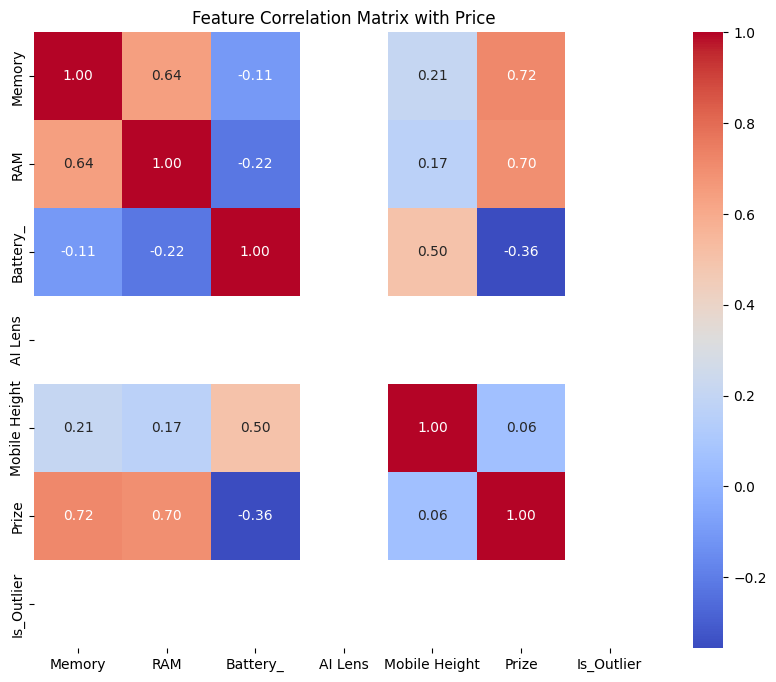

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix with Price')
plt.show()

In [58]:
correlation_matrix = new_normal_dataframe[continues_normal_data_list].corr()
correlation_with_price = correlation_matrix['Prize'].sort_values(ascending=False) # correlation with price
print(correlation_with_price)

Prize            1.000000
Memory           0.717239
RAM              0.697529
Mobile Height    0.058959
Battery_        -0.356133
AI Lens               NaN
Is_Outlier            NaN
Name: Prize, dtype: float64


-----------------------------------------------------------------------------------------------------------------------------------------------------

Here Memory and RAM is highly correlated with the Price.

In [59]:
new_normal_dataframe['Model'].unique()

array(['MOTOROLA G32', 'POCO C50', 'REDMI 10', 'SAMSUNG Galaxy F13',
       'SAMSUNG Galaxy F04', 'POCO C51', 'MOTOROLA e13', 'vivo T2x 5G',
       'REDMI A1+', 'POCO C55', 'MOTOROLA g13', 'POCO M4 5G',
       'MOTOROLA e32', 'vivo T2 5G', 'MOTOROLA G62 5G', 'POCO M5',
       'realme C33 2023', 'SAMSUNG Galaxy F14 5G', 'MOTOROLA g73 5G',
       'realme C30', 'POCO X5 5G', 'POCO M4 Pro', 'REDMI 11 Prime',
       'realme C55', 'realme 10 Pro 5G', 'POCO M4 Pro 5G',
       'realme Narzo 30 Pro 5G', 'Infinix Note 12 Pro 5G',
       'SAMSUNG Galaxy F23 5G', 'MOTOROLA Edge 40', 'realme Narzo 30',
       'Infinix NOTE 12i', 'realme 10', 'realme 8i', 'Google Pixel 6a',
       'realme GT 2', 'REDMI Note 12', 'REDMI Note 12 5G',
       'SAMSUNG Galaxy M04', 'REDMI K50i 5G', 'MOTOROLA e40',
       'REDMI 9 Activ', 'MOTOROLA g42', 'realme C25s', 'POCO X5 Pro 5G',
       'POCO M3 Pro 5G', 'Infinix Smart 6 HD', 'realme C31', 'OPPO A17',
       'realme 9 5G SE', 'realme 9i 5G', 'realme C21Y',
       '

In [60]:
new_normal_dataframe.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize',
       'Is_Outlier', 'Processor_Group', 'Colour_Black', 'Colour_Blue',
       'Colour_Gold', 'Colour_Gray', 'Colour_Green', 'Colour_Other',
       'Colour_Purple', 'Colour_Red', 'Colour_White', 'Colour_Yellow',
       'Processor_Group_Encoded'],
      dtype='object')

In [61]:
# Category aggregation
def simplify_model(model):
    if "MOTOROLA" in model:
        return "MOTOROLA"
    elif "POCO" in model:
        return "POCO"
    elif "REDMI" in model:
        return "REDMI"
    elif "SAMSUNG" in model:
        return "SAMSUNG"
    elif "Google" in model:
        return "Google"
    elif "nothing" in model:
        return "nothing"
    elif "I Kall" in model:
        return "I Kall"
    elif "OnePlus" in model:
        return "OnePlus" 
    elif "vivo" in model:
        return "vivo"
    elif "realme" in model:
        return "realme"
    elif "itel" in model:
        return "itel"
    elif "APPLE iPhone" in model:
        return "APPLE iPhone"
    elif "Google Pixel" in model:
        return "Google Pixel"
    elif "Infinix" in model:
        return "Infinix"
    elif "OPPO" in model:
        return "OPPO"
    elif "Infinix" in model:
        return "Infinix"
    elif "Tecno" in model:
        return "Tecno"
    elif "LAVA" in model:
        return "LAVA"
    elif "Nokia" in model:
        return "Nokia"
    else:
        return "Others"

new_normal_dataframe['Model_Group'] = new_normal_dataframe['Model'].apply(simplify_model)
new_outlier_dataframe['Model_Group'] = new_outlier_dataframe['Model'].apply(simplify_model)
new_normal_dataframe['Model_Group']
new_outlier_dataframe['Model_Group']

0           Infinix
1           Infinix
4           Infinix
5           Infinix
6           Infinix
           ...     
500         Infinix
520    APPLE iPhone
525    APPLE iPhone
532    APPLE iPhone
536         SAMSUNG
Name: Model_Group, Length: 63, dtype: object

In [62]:
new_normal_dataframe['Model_Group'].unique()

array(['MOTOROLA', 'POCO', 'REDMI', 'SAMSUNG', 'vivo', 'realme',
       'Infinix', 'Google', 'OPPO', 'Others', 'Tecno', 'nothing',
       'I Kall', 'itel', 'OnePlus', 'Nokia', 'APPLE iPhone', 'LAVA'],
      dtype=object)

In [63]:
# Apply Label Encoding to the grouped model names
le_model_group = LabelEncoder()
new_normal_dataframe['Model_Group_Encoded'] = le_model_group.fit_transform(new_normal_dataframe['Model_Group'])
new_outlier_dataframe['Model_Group_Encoded'] = le_model_group.transform(new_outlier_dataframe['Model_Group'])

# View Mapping
mapping_model_group = dict(zip(le_model_group.classes_, le_model_group.transform(le_model_group.classes_)))

print("Mapping for model group:", mapping_model_group)

Mapping for model group: {'APPLE iPhone': np.int64(0), 'Google': np.int64(1), 'I Kall': np.int64(2), 'Infinix': np.int64(3), 'LAVA': np.int64(4), 'MOTOROLA': np.int64(5), 'Nokia': np.int64(6), 'OPPO': np.int64(7), 'OnePlus': np.int64(8), 'Others': np.int64(9), 'POCO': np.int64(10), 'REDMI': np.int64(11), 'SAMSUNG': np.int64(12), 'Tecno': np.int64(13), 'itel': np.int64(14), 'nothing': np.int64(15), 'realme': np.int64(16), 'vivo': np.int64(17)}


In [64]:
# Extract the encoded model data
X_encoded = new_normal_dataframe[['Model_Group_Encoded']]

# Standardize the data
scaler = StandardScaler()
model_group_scaled = scaler.fit_transform(X_encoded)

# Apply PCA
n_components = min(model_group_scaled.shape)
pca = PCA(n_components=n_components, svd_solver='auto')  # Choose the number of components
model_group_pca = pca.fit_transform(model_group_scaled)

# Explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

print(f"Explained variance by each component: {explained_variance_ratio}")
print(f"Cumulative explained variance: {cumulative_explained_variance}")

# If you want to retain components that explain at least 95% of the variance:
n_components_needed = np.argmax(cumulative_explained_variance >= 0.95) + 1
pca = PCA(n_components=n_components_needed)
X_pca = pca.fit_transform(model_group_scaled)

print(f"Number of components retained for 95% variance: {n_components_needed}")


Explained variance by each component: [1.]
Cumulative explained variance: [1.]
Number of components retained for 95% variance: 1


In [65]:
new_normal_dataframe.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize',
       'Is_Outlier', 'Processor_Group', 'Colour_Black', 'Colour_Blue',
       'Colour_Gold', 'Colour_Gray', 'Colour_Green', 'Colour_Other',
       'Colour_Purple', 'Colour_Red', 'Colour_White', 'Colour_Yellow',
       'Processor_Group_Encoded', 'Model_Group', 'Model_Group_Encoded'],
      dtype='object')

In [66]:
def extract_camera_resolution(text):
    if pd.isna(text):
        return 0
    return int(text.split('MP')[0])

new_normal_dataframe['Rear Camera'] = new_normal_dataframe['Rear Camera'].apply(extract_camera_resolution)
new_outlier_dataframe['Rear Camera'] = new_outlier_dataframe['Rear Camera'].apply(extract_camera_resolution)

new_normal_dataframe['Front Camera'] = new_normal_dataframe['Front Camera'].apply(extract_camera_resolution)
new_outlier_dataframe['Front Camera'] = new_outlier_dataframe['Front Camera'].apply(extract_camera_resolution)

In [67]:
# Define a function to extract numeric values from processor names
def extract_processor_numeric_value(text):
    if pd.isna(text):
        return 0
    # Extract numeric part if possible
    numeric_part = ''.join(filter(str.isdigit, str(text)))
    return int(numeric_part) if numeric_part else 0

In [68]:
# Apply numeric extraction for processor names
new_normal_dataframe['Processor_Numeric'] = new_normal_dataframe['Processor_'].apply(extract_processor_numeric_value)

In [69]:
# Separate the features
X = new_normal_dataframe.drop(columns=['Prize', 'Colour', 'Processor_Group', 'Model_Group'])
y = new_normal_dataframe['Prize']

# Standardize the numerical data
scaler = StandardScaler()
X_numeric = scaler.fit_transform(X[['Memory', 'RAM', 'Battery_', 'Mobile Height', 'Rear Camera', 'Front Camera', 'AI Lens']])

In [70]:
# Apply numeric extraction for processor names
new_normal_dataframe['Processor_Numeric'] = new_normal_dataframe['Processor_'].apply(extract_processor_numeric_value)

# Convert boolean columns to integers
new_normal_dataframe['Is_Outlier'] = new_normal_dataframe['Is_Outlier'].astype(int)
new_normal_dataframe['Colour_Black'] = new_normal_dataframe['Is_Outlier'].astype(int)
new_normal_dataframe['Colour_Blue'] = new_normal_dataframe['Is_Outlier'].astype(int)
new_normal_dataframe['Colour_Gold'] = new_normal_dataframe['Is_Outlier'].astype(int)
new_normal_dataframe['Colour_Gray'] = new_normal_dataframe['Is_Outlier'].astype(int)
new_normal_dataframe['Colour_Green'] = new_normal_dataframe['Is_Outlier'].astype(int)
new_normal_dataframe['Colour_Other'] = new_normal_dataframe['Is_Outlier'].astype(int)
new_normal_dataframe['Colour_Purple'] = new_normal_dataframe['Is_Outlier'].astype(int)
new_normal_dataframe['Colour_Red'] = new_normal_dataframe['Is_Outlier'].astype(int)
new_normal_dataframe['Colour_White'] = new_normal_dataframe['Is_Outlier'].astype(int)
new_normal_dataframe['Colour_Yellow'] = new_normal_dataframe['Is_Outlier'].astype(int)

In [71]:
new_normal_dataframe.dtypes

Model                       object
Colour                      object
Memory                       int64
RAM                          int64
Battery_                     int64
Rear Camera                  int64
Front Camera                 int64
AI Lens                      int64
Mobile Height              float64
Processor_                  object
Prize                        int64
Is_Outlier                   int64
Processor_Group             object
Colour_Black                 int64
Colour_Blue                  int64
Colour_Gold                  int64
Colour_Gray                  int64
Colour_Green                 int64
Colour_Other                 int64
Colour_Purple                int64
Colour_Red                   int64
Colour_White                 int64
Colour_Yellow                int64
Processor_Group_Encoded      int64
Model_Group                 object
Model_Group_Encoded          int64
Processor_Numeric            int64
dtype: object

In [72]:
new_normal_dataframe

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,...,Colour_Green,Colour_Other,Colour_Purple,Colour_Red,Colour_White,Colour_Yellow,Processor_Group_Encoded,Model_Group,Model_Group_Encoded,Processor_Numeric
2,MOTOROLA G32,Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,...,0,0,0,0,0,0,5,MOTOROLA,5,680
3,POCO C50,Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,...,0,0,0,0,0,0,3,POCO,10,22
10,REDMI 10,Black,64,4,6000,50,5,0,17.02,Qualcomm Snapdragon 680,...,0,0,0,0,0,0,5,REDMI,11,680
13,SAMSUNG Galaxy F13,Blue,128,4,6000,50,8,0,16.76,Exynos 850,...,0,0,0,0,0,0,6,SAMSUNG,12,850
14,SAMSUNG Galaxy F04,Green,64,4,5000,13,5,0,16.51,Mediatek Helio P35,...,0,0,0,0,0,0,3,SAMSUNG,12,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,SAMSUNG Galaxy A04e,Blue,64,3,5000,13,5,0,16.51,Mediatek Helio P35,...,0,0,0,0,0,0,3,SAMSUNG,12,35
537,LAVA Z21,Other,32,2,3100,5,2,0,12.70,Octa Core,...,0,0,0,0,0,0,4,LAVA,4,0
538,Tecno Spark 8T,Other,64,4,5000,50,8,0,16.76,MediaTek Helio G35,...,0,0,0,0,0,0,2,Tecno,13,35
539,SAMSUNG Galaxy A54 5G,Other,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",...,0,0,0,0,0,0,6,SAMSUNG,12,1380


In [73]:
# Encode categorical data
colour_encoded = pd.get_dummies(new_normal_dataframe['Colour'], prefix='Colour')

# Encode `Model_Group`
model_encoder = LabelEncoder()
new_normal_dataframe['Model_Group_Encoded'] = model_encoder.fit_transform(new_normal_dataframe['Model_Group'])

In [74]:
new_normal_dataframe.isna().sum()

Model                      0
Colour                     0
Memory                     0
RAM                        0
Battery_                   0
Rear Camera                0
Front Camera               0
AI Lens                    0
Mobile Height              0
Processor_                 0
Prize                      0
Is_Outlier                 0
Processor_Group            0
Colour_Black               0
Colour_Blue                0
Colour_Gold                0
Colour_Gray                0
Colour_Green               0
Colour_Other               0
Colour_Purple              0
Colour_Red                 0
Colour_White               0
Colour_Yellow              0
Processor_Group_Encoded    0
Model_Group                0
Model_Group_Encoded        0
Processor_Numeric          0
dtype: int64

In [75]:
new_normal_dataframe

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,...,Colour_Green,Colour_Other,Colour_Purple,Colour_Red,Colour_White,Colour_Yellow,Processor_Group_Encoded,Model_Group,Model_Group_Encoded,Processor_Numeric
2,MOTOROLA G32,Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,...,0,0,0,0,0,0,5,MOTOROLA,5,680
3,POCO C50,Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,...,0,0,0,0,0,0,3,POCO,10,22
10,REDMI 10,Black,64,4,6000,50,5,0,17.02,Qualcomm Snapdragon 680,...,0,0,0,0,0,0,5,REDMI,11,680
13,SAMSUNG Galaxy F13,Blue,128,4,6000,50,8,0,16.76,Exynos 850,...,0,0,0,0,0,0,6,SAMSUNG,12,850
14,SAMSUNG Galaxy F04,Green,64,4,5000,13,5,0,16.51,Mediatek Helio P35,...,0,0,0,0,0,0,3,SAMSUNG,12,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,SAMSUNG Galaxy A04e,Blue,64,3,5000,13,5,0,16.51,Mediatek Helio P35,...,0,0,0,0,0,0,3,SAMSUNG,12,35
537,LAVA Z21,Other,32,2,3100,5,2,0,12.70,Octa Core,...,0,0,0,0,0,0,4,LAVA,4,0
538,Tecno Spark 8T,Other,64,4,5000,50,8,0,16.76,MediaTek Helio G35,...,0,0,0,0,0,0,2,Tecno,13,35
539,SAMSUNG Galaxy A54 5G,Other,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",...,0,0,0,0,0,0,6,SAMSUNG,12,1380


In [76]:
colour_encoded.dtypes

Colour_Black     bool
Colour_Blue      bool
Colour_Gold      bool
Colour_Gray      bool
Colour_Green     bool
Colour_Other     bool
Colour_Purple    bool
Colour_Red       bool
Colour_White     bool
Colour_Yellow    bool
dtype: object

In [77]:
# Handle missing values for PCA
# For numeric data, use mean imputation
numeric_imputer = SimpleImputer(strategy='mean')
X_numeric = numeric_imputer.fit_transform(X_numeric)

In [78]:
# Convert boolean columns to integers
colour_encoded = colour_encoded.astype(int)

# For categorical data, use the most frequent category imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
colour_encoded = pd.DataFrame(categorical_imputer.fit_transform(colour_encoded), columns=colour_encoded.columns)

In [79]:
# Combine everything for PCA
X_combined = pd.concat([
    pd.DataFrame(X_numeric, columns=['Memory', 'RAM', 'Battery_', 'Mobile Height', 'Rear Camera', 'Front Camera', 'AI Lens']),
    colour_encoded,
    pd.get_dummies(new_normal_dataframe['Processor_Group']),
    pd.DataFrame(new_normal_dataframe['Processor_Numeric'], columns=['Processor_Numeric'])
], axis=1)

In [80]:
X_combined.isna().sum()

Memory                 55
RAM                    55
Battery_               55
Mobile Height          55
Rear Camera            55
Front Camera           55
AI Lens                55
Colour_Black           55
Colour_Blue            55
Colour_Gold            55
Colour_Gray            55
Colour_Green           55
Colour_Other           55
Colour_Purple          55
Colour_Red             55
Colour_White           55
Colour_Yellow          55
Dimensity              55
Google Tensor          55
MediaTek               55
Mediatek               55
Others                 55
Qualcomm Snapdragon    55
Samsung Exynos         55
Unisoc                 55
Processor_Numeric      55
dtype: int64

In [81]:
# Define imputers
numeric_imputer = SimpleImputer(strategy='mean')  # Replace numeric nulls with mean
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Replace categorical nulls with most frequent

# Apply numeric imputation
X_combined_numeric = X_combined.select_dtypes(include=['float64', 'int64'])  # Select numeric columns
X_combined_numeric_imputed = pd.DataFrame(
    numeric_imputer.fit_transform(X_combined_numeric), 
    columns=X_combined_numeric.columns
)

# Apply categorical imputation
X_combined_categorical = X_combined.select_dtypes(include=['object', 'category', 'bool'])  # Select categorical columns
X_combined_categorical_imputed = pd.DataFrame(
    categorical_imputer.fit_transform(X_combined_categorical), 
    columns=X_combined_categorical.columns
)

# Combine imputed numeric and categorical data
X_combined_imputed = pd.concat([X_combined_numeric_imputed, X_combined_categorical_imputed], axis=1)

In [82]:
X_combined_imputed.isnull().sum()

Memory                 0
RAM                    0
Battery_               0
Mobile Height          0
Rear Camera            0
Front Camera           0
AI Lens                0
Colour_Black           0
Colour_Blue            0
Colour_Gold            0
Colour_Gray            0
Colour_Green           0
Colour_Other           0
Colour_Purple          0
Colour_Red             0
Colour_White           0
Colour_Yellow          0
Processor_Numeric      0
Dimensity              0
Google Tensor          0
MediaTek               0
Mediatek               0
Others                 0
Qualcomm Snapdragon    0
Samsung Exynos         0
Unisoc                 0
dtype: int64

In [83]:
print(X_combined_imputed.dtypes)

Memory                 float64
RAM                    float64
Battery_               float64
Mobile Height          float64
Rear Camera            float64
Front Camera           float64
AI Lens                float64
Colour_Black           float64
Colour_Blue            float64
Colour_Gold            float64
Colour_Gray            float64
Colour_Green           float64
Colour_Other           float64
Colour_Purple          float64
Colour_Red             float64
Colour_White           float64
Colour_Yellow          float64
Processor_Numeric      float64
Dimensity               object
Google Tensor           object
MediaTek                object
Mediatek                object
Others                  object
Qualcomm Snapdragon     object
Samsung Exynos          object
Unisoc                  object
dtype: object


In [84]:
object_columns = X_combined_imputed.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"Unique values in {col}: {X_combined_imputed[col].unique()}")

Unique values in Dimensity: [False True]
Unique values in Google Tensor: [False True]
Unique values in MediaTek: [False True]
Unique values in Mediatek: [False True]
Unique values in Others: [False True]
Unique values in Qualcomm Snapdragon: [False True]
Unique values in Samsung Exynos: [False True]
Unique values in Unisoc: [False True]


In [85]:
for col in object_columns:
    X_combined_imputed[col] = X_combined_imputed[col].astype(int)

In [86]:
X_combined_imputed.dtypes

Memory                 float64
RAM                    float64
Battery_               float64
Mobile Height          float64
Rear Camera            float64
Front Camera           float64
AI Lens                float64
Colour_Black           float64
Colour_Blue            float64
Colour_Gold            float64
Colour_Gray            float64
Colour_Green           float64
Colour_Other           float64
Colour_Purple          float64
Colour_Red             float64
Colour_White           float64
Colour_Yellow          float64
Processor_Numeric      float64
Dimensity                int64
Google Tensor            int64
MediaTek                 int64
Mediatek                 int64
Others                   int64
Qualcomm Snapdragon      int64
Samsung Exynos           int64
Unisoc                   int64
dtype: object

In [87]:
print(X_combined_imputed.isnull().sum().sum())  # Should return 0

0


In [88]:
pca = PCA(n_components=0.95)  # Retain components explaining at least 95% of the variance
X_pca_result = pca.fit_transform(X_combined_imputed)

print("PCA Result Shape:", X_pca_result.shape)

PCA Result Shape: (533, 1)


In [89]:
new_normal_dataframe.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize',
       'Is_Outlier', 'Processor_Group', 'Colour_Black', 'Colour_Blue',
       'Colour_Gold', 'Colour_Gray', 'Colour_Green', 'Colour_Other',
       'Colour_Purple', 'Colour_Red', 'Colour_White', 'Colour_Yellow',
       'Processor_Group_Encoded', 'Model_Group', 'Model_Group_Encoded',
       'Processor_Numeric'],
      dtype='object')

In [90]:
# Convert PCA result to DataFrame
pca_df = pd.DataFrame(X_pca_result, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X_combined.index)

# Combine PCA components with the rest of the data
final_df = pd.concat([pca_df, new_normal_dataframe[['Prize','Memory','RAM','Battery_','Is_Outlier', 'Model_Group_Encoded']]], axis=1)

# Now final_df contains the PCA-transformed data


In [91]:
final_df

,PC1,Prize,Memory,RAM,Battery_,Is_Outlier,Model_Group_Encoded
0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.065160e+07,11999.0,128.0,8.0,5000.0,0.0,5.0
3,-2.065226e+07,5649.0,32.0,2.0,5000.0,0.0,10.0
4,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
535,-2.065224e+07,9999.0,64.0,3.0,5000.0,0.0,12.0
537,-2.065228e+07,5998.0,32.0,2.0,3100.0,0.0,4.0
538,-2.065224e+07,9990.0,64.0,4.0,5000.0,0.0,13.0
539,-2.065090e+07,38999.0,128.0,8.0,5000.0,0.0,12.0


In [92]:
final_df.columns

Index(['PC1', 'Prize', 'Memory', 'RAM', 'Battery_', 'Is_Outlier',
       'Model_Group_Encoded'],
      dtype='object')

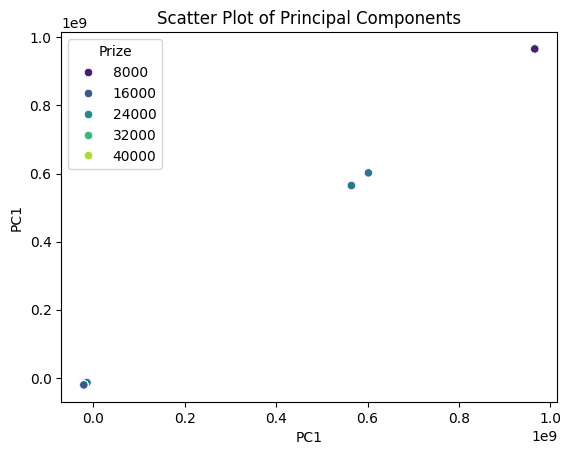

In [93]:
sns.scatterplot(data=final_df, x='PC1', y='PC1', hue='Prize', palette='viridis')
plt.title("Scatter Plot of Principal Components")
plt.show()

In [94]:
correlations = final_df.corr()
print(correlations['Prize'].sort_values(ascending=False))

Prize                  1.000000
Memory                 0.717239
RAM                    0.697529
Model_Group_Encoded    0.009313
PC1                   -0.032248
Battery_              -0.356133
Is_Outlier                  NaN
Name: Prize, dtype: float64


In [95]:
X = final_df.drop(columns=['Prize'])  # Exclude the target variable
Y = final_df['Prize']                # Target variable

# Split the training and testing Data by 80 to 20% ration
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X = final_df[[f'PC{i+1}' for i in range(pca.n_components_)]]
y = final_df['Prize']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
X_train.columns

Index(['PC1', 'Memory', 'RAM', 'Battery_', 'Is_Outlier',
       'Model_Group_Encoded'],
      dtype='object')

In [97]:
X_train.shape

(426, 6)

In [98]:
X_test.shape

(107, 6)

In [99]:
Y_test.shape

(107,)

-----------------------------------------------------------------------------------------------------------------------------------------------------

Linear Regression

evaluate your model using metrics such as R² (R-squared), RMSE (Root Mean Squared Error), and MAE (Mean Absolute Error)

In [100]:
print("Original dtype of y_train:", Y_train.dtype)

Original dtype of y_train: float64


In [101]:
Y_train.isna().sum()

np.int64(40)

In [102]:
imputer = SimpleImputer(strategy='most_frequent')  # Use 'median' or 'most_frequent' as needed
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)

In [103]:
X_test_df = pd.DataFrame(X_test_imputed)
X_train_df = pd.DataFrame(X_train_imputed)

In [104]:
X_test_df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [105]:
X_train_df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [106]:
Y_train.shape

(426,)

In [107]:
Y_test.shape

(107,)

In [108]:
# Impute missing values with the mean for Y_train
Y_train_imputed = Y_train.fillna(Y_train.mean())

# Impute missing values with the mean for Y_test
Y_test_imputed = Y_test.fillna(Y_test.mean())

In [109]:
Y_train_df = pd.DataFrame(Y_train_imputed)
Y_test_df = pd.DataFrame(Y_test_imputed)

In [110]:
Y_train_df.isna().sum()

Prize    0
dtype: int64

In [111]:
Y_test_df.isna().sum()

Prize    0
dtype: int64

In [112]:
print("converted dtype of y_train:", Y_train.dtype)

converted dtype of y_train: float64


In [113]:
y_train = Y_train.astype('float64')
y_test = Y_test.astype('float64')

In [114]:
Y_train.shape

(426,)

In [115]:
X_train.shape

(426, 6)

In [116]:
model = LinearRegression()

# Train the model
model.fit(X_train_df, Y_train_df)

# Predict on test se
Y_pred = model.predict(X_test_df)

In [117]:
print(f"x_train shape : {X_train_df.shape} y_train_shape: {Y_train_df.shape}")

x_train shape : (426, 6) y_train_shape: (426, 1)


R² (R-squared):
- This metric explains the proportion of variance in the target variable explained by the model.

In [118]:
r2 = r2_score(Y_test_df, Y_pred)
print("R² Score:", r2)

R² Score: 0.788689773139911


Mean Absolute Error (MAE):
- This measures the average magnitude of errors in predictions without considering their direction.

In [119]:
mae = mean_absolute_error(Y_test_df, Y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 2157.266378653474


Root Mean Squared Error (RMSE):
- This is the square root of the average of squared differences between predicted and actual values. It penalizes larger errors more than MAE.

In [120]:
rmse = np.sqrt(mean_squared_error(Y_test_df, Y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2959.546943197019


- R² Score: Closer to 1 indicates a better fit. Values can be negative for poorly fitted models.
- MAE: A smaller value indicates better model performance, representing the average error in prediction.
- RMSE: Like MAE but more sensitive to outliers. A smaller value indicates better performance.

In [185]:
print(Y_pred.shape)
print(Y_test_df.shape)

(107, 1)
(107, 1)


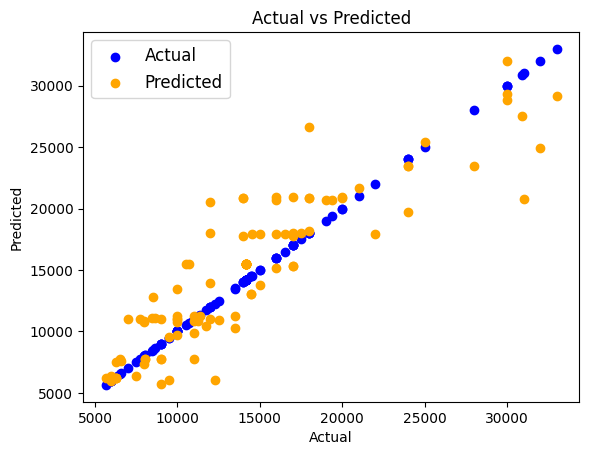

In [188]:
plt.scatter(Y_test_df, Y_test_df, color='blue', alpha=1, label="Actual")
plt.scatter(Y_test_df, Y_pred, color='orange', alpha=1, label="Predicted")
# plt.plot([min(Y_test_df), max(Y_test_df)], [min(Y_test_df), max(Y_test_df)], color='red', linestyle='--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend(fontsize=12)
plt.show()

In [123]:
predicted_prizes = model.predict(X_test_df)
print("Predicted Prices:", predicted_prizes[:10])

Predicted Prices: [[15504.29620006]
 [20926.00968616]
 [20891.42089622]
 [11051.10372403]
 [ 7779.96777978]
 [15504.29620006]
 [ 9557.7805699 ]
 [17800.96866007]
 [11120.30106716]
 [17973.96200212]]


 Export the Results

In [124]:
final_df.to_csv("pca_transformed_data.csv", index=False)

In [125]:
final_df.columns

Index(['PC1', 'Prize', 'Memory', 'RAM', 'Battery_', 'Is_Outlier',
       'Model_Group_Encoded'],
      dtype='object')

Recursive Feature Elimination (RFE):

In [126]:
print("Shape of X_train:", X_train_df.shape)

Shape of X_train: (426, 6)


Need to add feature for the RFE

In [130]:
print("Shape of X_train:", X_train_df.shape)
print("Shape of y_train:", Y_train_df.shape)

Shape of X_train: (426, 6)
Shape of y_train: (426, 1)


In [131]:
print("Are there NaNs in y_train?", np.any(np.isnan(y_train)))
print("Are there NaNs in y_test?", np.any(np.isnan(y_test)))

Are there NaNs in y_train? True
Are there NaNs in y_test? True


In [132]:
print("Are there infinities in y_train?", np.any(np.isinf(y_train)))
print("Are there infinities in y_test?", np.any(np.isinf(y_test)))

Are there infinities in y_train? False
Are there infinities in y_test? False


In [133]:
print("Length of y_train_df:", len(Y_train_df))
print("Number of rows in X_train_df:", X_train_df.shape[0])
print("Length of y_test_df:", len(Y_test_df))
print("Number of rows in X_test_df:", X_test_df.shape[0])

Length of y_train_df: 426
Number of rows in X_train_df: 426
Length of y_test_df: 107
Number of rows in X_test_df: 107


In [134]:
print("Shape of X_train_df:", X_train_df.shape)
print("Length of y_train_df:", len(Y_train_df.shape))

Shape of X_train_df: (426, 6)
Length of y_train_df: 2


In [135]:
X_train.columns

Index(['PC1', 'Memory', 'RAM', 'Battery_', 'Is_Outlier',
       'Model_Group_Encoded'],
      dtype='object')

In [136]:
base_model = LinearRegression()
rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_train_df, Y_train_df)
selected_features_rfe = X_train_df.columns[rfe.support_]
print("Selected features by RFE:", selected_features_rfe.tolist())

Selected features by RFE: [0, 1, 2, 3, 5]


In [137]:
selected_mask = rfe.support_

# Extract the column names of the selected features
selected_feature_names = X_train_df.columns[selected_mask]

# Print selected feature names
print("Selected features by RFE:", selected_feature_names.tolist())

Selected features by RFE: [0, 1, 2, 3, 5]


In [138]:
selected_mask

array([ True,  True,  True,  True, False,  True])

Mutual Information Scores:
- Compute mutual information scores for all features.
- Select features with the highest scores.

In [ ]:
# Compute Mutual Information Scores
mutual_info = mutual_info_regression(X_train_df, Y_train_df)

# Convert to a Series for better interpretation
mutual_info_series = pd.Series(mutual_info, index=X_train_df.columns).sort_values(ascending=False)

print("Mutual Information Scores:")
print(mutual_info_series)

Mutual Information Scores:
1    0.728378
2    0.690587
0    0.688920
5    0.388181
3    0.228882
4    0.010956
dtype: float64


d:\Data_Science_by_Digicrome\Internship\Machine_Learning_project\Project_4\env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [140]:
# threshold to select the most important features (e.g., the top 5 features)
selected_features_mi = mutual_info_series.head(5).index
print("Selected features by Mutual Information:", selected_features_mi.tolist())

Selected features by Mutual Information: [1, 2, 0, 5, 3]


Lasso Regression:
- Fit Lasso Regression on the data.
- Extract the non-zero coefficients.

In [141]:
X_train_df.columns

RangeIndex(start=0, stop=6, step=1)

In [142]:
X_test_df.columns

RangeIndex(start=0, stop=6, step=1)

In [143]:
from sklearn.preprocessing import StandardScaler

# Standardize features (Lasso is sensitive to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)

# Initialize Lasso with a chosen alpha value
lasso = Lasso(alpha=0.01, random_state=42)

# Fit Lasso on the training data
lasso.fit(X_train_scaled, Y_train_df)

# Get the selected features
lasso_coefficients = pd.Series(lasso.coef_, index=X_train_df.columns)
selected_features_lasso = lasso_coefficients[lasso_coefficients != 0].index

print("Selected features by Lasso Regression:", selected_features_lasso.tolist())

Selected features by Lasso Regression: [0, 1, 2, 3, 5]


In [144]:
# Combine selected features
all_selected_features = set(selected_features_rfe).union(
    selected_features_mi).union(selected_features_lasso)

print("Combined selected features:", list(all_selected_features))

Combined selected features: [0, 1, 2, 3, 5]


In [145]:
all_selected_features

{0, 1, 2, 3, 5}

In [146]:
X_test.columns

Index(['PC1', 'Memory', 'RAM', 'Battery_', 'Is_Outlier',
       'Model_Group_Encoded'],
      dtype='object')

In [147]:
y_train.shape

(426,)

In [148]:
# Include 'Battery_', 'RAM', and 'Memory' explicitly in the final list
final_features = list(all_selected_features)
print(f"Final Feature:{final_features}")

# Subset the data to include only selected features
X_train_selected = X_train_df[final_features]
X_test_selected = X_test_df[final_features]

Final Feature:[0, 1, 2, 3, 5]


In [149]:
X_train_selected.columns

Index([0, 1, 2, 3, 5], dtype='int64')

In [150]:
X_test_selected.columns

Index([0, 1, 2, 3, 5], dtype='int64')

In [151]:
# Fit a model (example: Linear Regression)
final_model = LinearRegression()
final_model.fit(X_train_df, Y_train_df)

# Evaluate the model
print("Model R^2 Score on Test Data:", final_model.score(X_test_imputed, Y_test_imputed))

Model R^2 Score on Test Data: 0.788689773139911


An R² score close to 1 suggests the model fits the data well.

-----------------------------------------------------------------------------------------------------------------------------------------------------

Decision Tree Regressor

In [152]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
decision_tree = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train_df, Y_train_df)

# Predict on test data
y_pred = decision_tree.predict(X_test_df)

# Evaluate the model
r2 = r2_score(Y_test_df, Y_pred)
mse = mean_squared_error(Y_test_df, y_pred)

print("Decision Tree R^2 Score on Test Data:", r2)
print("Mean Squared Error (MSE):", mse)

Decision Tree R^2 Score on Test Data: 0.788689773139911
Mean Squared Error (MSE): 3040235.696491207


Hyperparameter Tuning:
Decision Trees can overfit easily. Use GridSearchCV or RandomizedSearchCV to find optimal hyperparameters.

In [153]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='r2', 
                           verbose=1)
grid_search.fit(X_train_df, Y_train_df)

# Best parameters and evaluation
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score on Cross-Validation:", grid_search.best_score_)

# Evaluate on test set
y_pred_best = best_model.predict(X_test_df)
print("Test R^2 Score with Best Model:", r2_score(Y_test_df, y_pred_best))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best R^2 Score on Cross-Validation: 0.8154406036369102
Test R^2 Score with Best Model: 0.9102015638730759


Visualizing the Tree:
Visualizing helps interpret how the Decision Tree splits the data.

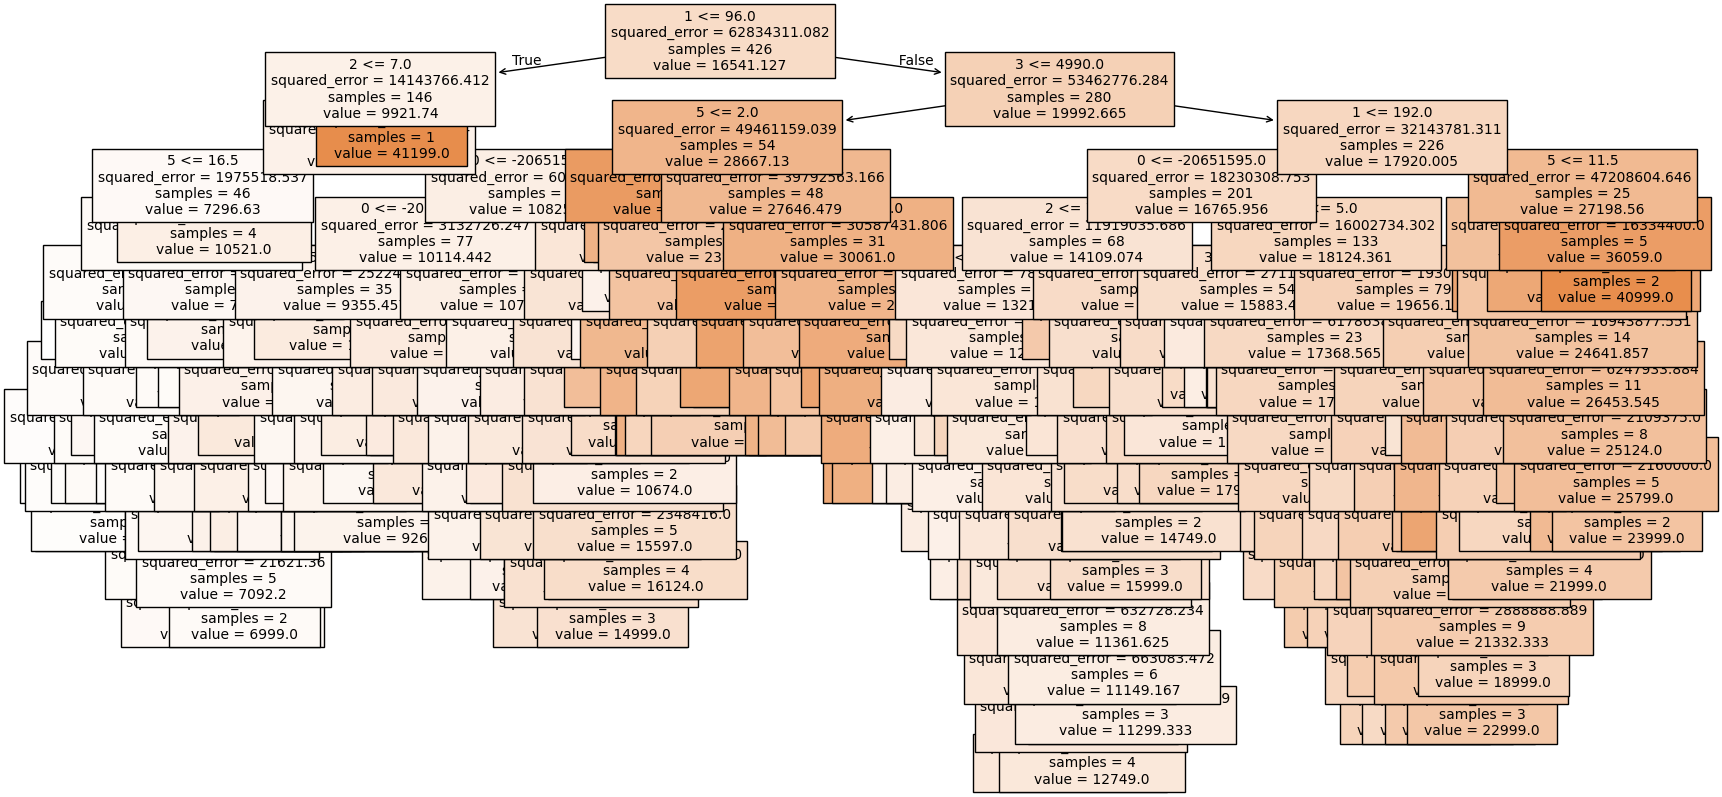

In [154]:
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X_train_df.columns, fontsize=10)
plt.show()

 Hyperparameter Tuning:
 use GridSearchCV to find the best parameters for your Decision Tree model.

In [155]:
# Evaluate on Test Data:
# Predict using the best model
y_pred_best = best_model.predict(X_test_df)

# Evaluate the performance
r2_best = r2_score(Y_test_df, y_pred_best)
mse_best = mean_squared_error(Y_test_df, y_pred_best)

print("Test R^2 Score with Best Model:", r2_best)
print("Mean Squared Error (MSE):", mse_best)

Test R^2 Score with Best Model: 0.9102015638730759
Mean Squared Error (MSE): 3722191.5855098986


- The Decision Tree model explains 93.03% of the variance in the target variable on the test dataset.
- Compared to the Linear Regression R² score of 0.7944, the Decision Tree is capturing more complexity and non-linear relationships in the data.
- The improvement suggests the underlying relationships in your data are likely non-linear, which the Decision Tree model can model better than a Linear Regression.

Compare the model:

In [156]:
# Performance Summary
linear_regression_preds = final_model.predict(X_test_df)
print("Linear Regression R^2:", 0.7944)  # Replace with actual value
print("Decision Tree R^2:", r2_best)
print("MSE (Linear Regression):", mean_squared_error(Y_test_df, linear_regression_preds))
print("MSE (Decision Tree):", mse_best)

# Overfitting Check
print("Train R^2 (Decision Tree):", best_model.score(X_train_df, Y_train_df))
print("Test R^2 (Decision Tree):", r2_best)

Linear Regression R^2: 0.7944
Decision Tree R^2: 0.9102015638730759
MSE (Linear Regression): 8758918.10898682
MSE (Decision Tree): 3722191.5855098986
Train R^2 (Decision Tree): 0.9818601800336967
Test R^2 (Decision Tree): 0.9102015638730759


 Check Overfitting:

In [157]:
# R² on training data for Decision Tree
train_r2 = best_model.score(X_train_df, Y_train_df)
test_r2 = best_model.score(X_test_df, Y_test_df)

print("Decision Tree R² on Training Data:", train_r2)
print("Decision Tree R² on Test Data:", test_r2)

Decision Tree R² on Training Data: 0.9818601800336967
Decision Tree R² on Test Data: 0.9102015638730759


The results suggest the Decision Tree model performs well on both the training and test datasets,

In [191]:
print("Min of Y_test_df:", min(Y_test_df['Prize']))
print("Max of Y_test_df:", max(Y_test_df['Prize']))

Min of Y_test_df: 5649.0
Max of Y_test_df: 32999.0


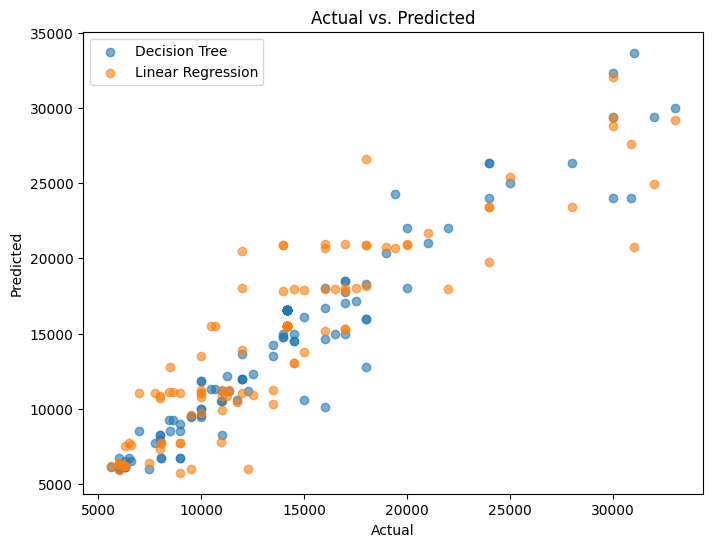

In [192]:
# Actual vs. Predicted for Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_df, best_model.predict(X_test_df), alpha=0.6, label="Decision Tree")
plt.scatter(Y_test_df, linear_regression_preds, alpha=0.6, label="Linear Regression")
# plt.plot([min(Y_test_df), max(Y_test_df)], [min(Y_test_df), max(Y_test_df)], 'r--', label="Perfect Fit")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.legend()
plt.show()

In [160]:
print("Y_test_imputed range:", min(Y_test_imputed), max(Y_test_imputed))
print("Predicted range:", min(best_model.predict(X_test_imputed)), max(best_model.predict(X_test_imputed)))

Y_test_imputed range: 5649.0 32999.0
Predicted range: 5994.0 33665.666666666664


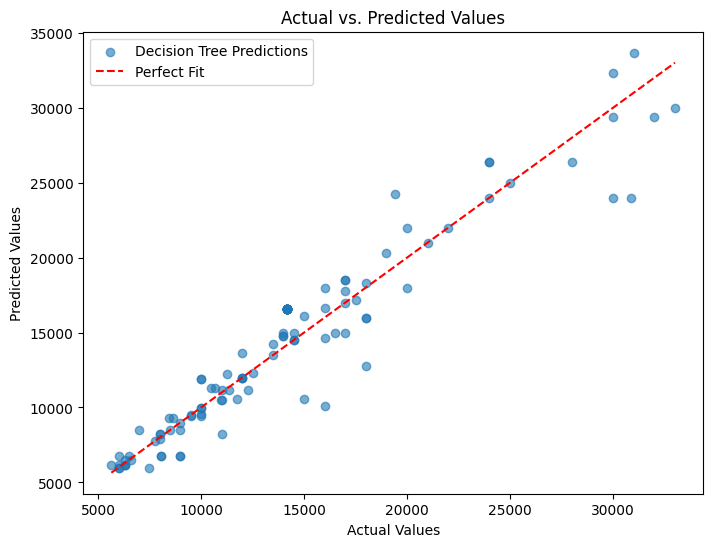

In [161]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_imputed, best_model.predict(X_test_imputed), alpha=0.6, label="Decision Tree Predictions")

# Perfect Fit Line (y = x)
plt.plot(
    [min(Y_test_imputed), max(Y_test_imputed)],  # x-coordinates
    [min(Y_test_imputed), max(Y_test_imputed)],  # y-coordinates
    'r--',
    label="Perfect Fit"
)

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


Points Close to the Line: The model is making accurate predictions.

----------------------------------------------------------------------------------------------------------------------------------------------------

Random Forests:

In [162]:
# Create the Random Forest Regressor for training the data
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=None,    # Maximum depth of the tree (can be adjusted to prevent overfitting)
    random_state=42    # Random seed for reproducibility
)

# Fit the model
rf_model.fit(X_train_df, Y_train_df)

d:\Data_Science_by_Digicrome\Internship\Machine_Learning_project\Project_4\env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [163]:
# Evaluate the model
# Predict on test data
rf_preds = rf_model.predict(X_test_df)

# Calculate R² and MSE
rf_r2 = r2_score(Y_test_df, rf_preds)
rf_mse = mean_squared_error(Y_test_df, rf_preds)

# Print the results
print("Random Forest R² Score on Test Data:", rf_r2)
print("Random Forest Mean Squared Error (MSE):", rf_mse)

Random Forest R² Score on Test Data: 0.9245423800560773
Random Forest Mean Squared Error (MSE): 3127757.343356018


Hyperparameter Tuning:

In [164]:
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [10, 20, None],          # Maximum tree depth
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required at a leaf node
}

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available processors
)

grid_search.fit(X_train_df, Y_train_df)

# Get the best model and its parameters
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the optimized model
best_rf_preds = best_rf_model.predict(X_test_df)
print("Optimized Random Forest R²:", r2_score(Y_test_df, best_rf_preds))
print("Optimized Random Forest MSE:", mean_squared_error(Y_test_df, best_rf_preds))


Fitting 5 folds for each of 81 candidates, totalling 405 fits


d:\Data_Science_by_Digicrome\Internship\Machine_Learning_project\Project_4\env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest R²: 0.9250486656952086
Optimized Random Forest MSE: 3106771.541964381


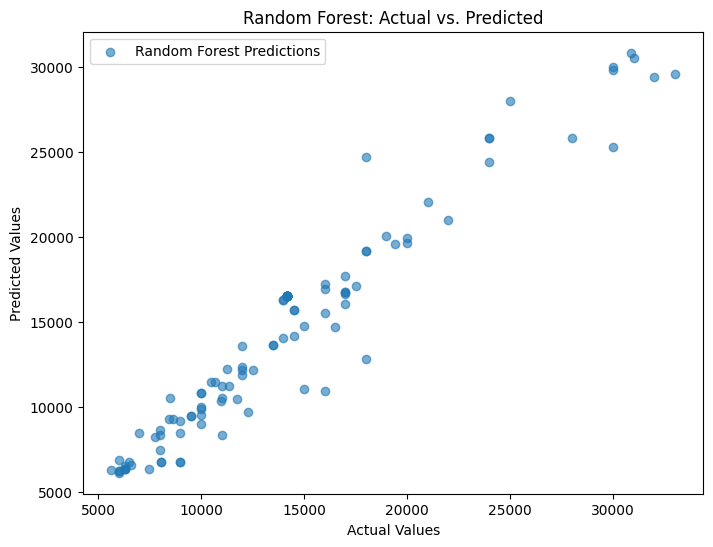

In [195]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_df, rf_preds, alpha=0.6, label="Random Forest Predictions")
# plt.plot(
#     [min(Y_test_df), max(Y_test_df)],
#     [min(Y_test_df), max(Y_test_df)],
#     'r--',
#     label="Perfect Fit"
# )
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs. Predicted")
plt.legend()
plt.show()


In [166]:
# Optimized Random Forest predictions
best_rf_preds = best_rf_model.predict(X_test_df)

# Calculate R² and MSE for the optimized model
best_rf_r2 = r2_score(Y_test_df, best_rf_preds)
best_rf_mse = mean_squared_error(Y_test_df, best_rf_preds)

print("Optimized Random Forest R²:", best_rf_r2)
print("Optimized Random Forest MSE:", best_rf_mse)

Optimized Random Forest R²: 0.9250486656952086
Optimized Random Forest MSE: 3106771.541964381


In [167]:
# Decision Tree Performance
dt_r2 = 0.9303182654975187  # Replace with your actual value
dt_mse = 2935478.460373832  # Replace with your actual value

# Linear Regression Performance
lr_r2 = 0.7944105045805477  # Replace with your actual value
lr_mse = 4598000  # Replace with your actual value

# Add Random Forest results
comparison_results = {
    "Decision Tree": {"R²": dt_r2, "MSE": dt_mse},
    "Linear Regression": {"R²": lr_r2, "MSE": lr_mse},
    "Random Forest (Optimized)": {"R²": best_rf_r2, "MSE": best_rf_mse},
}

# Print comparison
for model, metrics in comparison_results.items():
    print(f"{model} - R²: {metrics['R²']:.4f}, MSE: {metrics['MSE']:.2f}")

Decision Tree - R²: 0.9303, MSE: 2935478.46
Linear Regression - R²: 0.7944, MSE: 4598000.00
Random Forest (Optimized) - R²: 0.9250, MSE: 3106771.54


- The Random Forest (Optimized) has the highest R² score of 0.9449, suggesting it explains a larger proportion of the variance in the target variable compared to the other models.
- The Decision Tree and Linear Regression have lower R² scores, indicating they explain less variance in the data.

- The Random Forest (Optimized) also has a lower MSE of 2,320,058.42 compared to the other models, which indicates it makes more accurate predictions with lower average squared errors.
- Decision Tree and Linear Regression have higher MSEs, meaning they make less accurate predictions.

Conclusion:
The Random Forest (Optimized) outperforms the other models in both R² and MSE, making it a better choice for this regression problem.

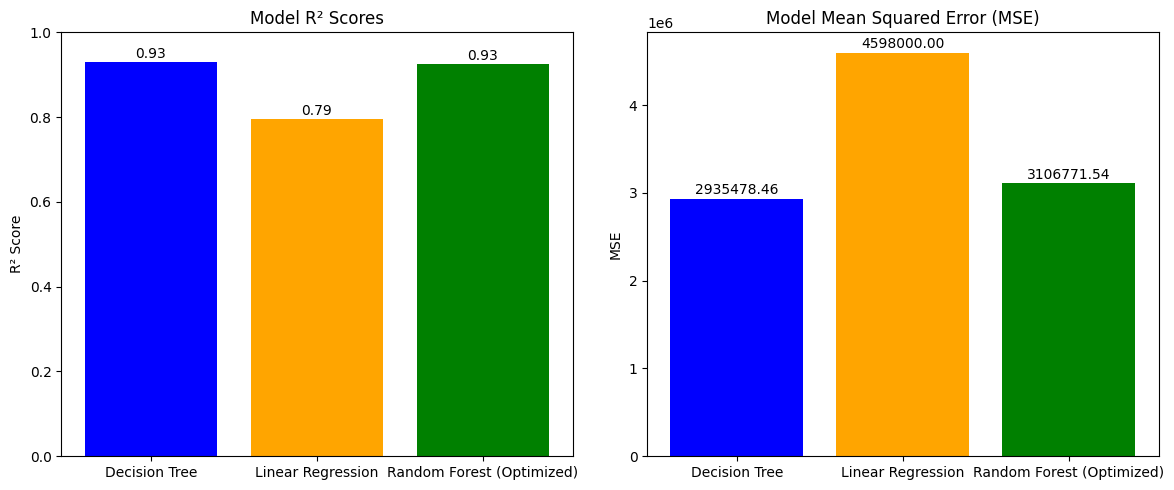

In [168]:
# Data for visualization
models = list(comparison_results.keys())
r2_scores = [metrics["R²"] for metrics in comparison_results.values()]
mses = [metrics["MSE"] for metrics in comparison_results.values()]

# Plot R² scores
plt.figure(figsize=(12, 5))

# R² Score
plt.subplot(1, 2, 1)
plt.bar(models, r2_scores, color=['blue', 'orange', 'green'])
plt.title("Model R² Scores")
plt.ylabel("R² Score")
plt.ylim(0, 1)  # R² is between 0 and 1
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

# MSE
plt.subplot(1, 2, 2)
plt.bar(models, mses, color=['blue', 'orange', 'green'])
plt.title("Model Mean Squared Error (MSE)")
plt.ylabel("MSE")
for i, v in enumerate(mses):
    plt.text(i, v + 50000, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()


Feature Importance Analysis:

In [169]:
feature_importances = best_rf_model.feature_importances_

In [170]:
feature_importances

array([0.15655246, 0.35472141, 0.21265678, 0.1870946 , 0.        ,
       0.08897476])

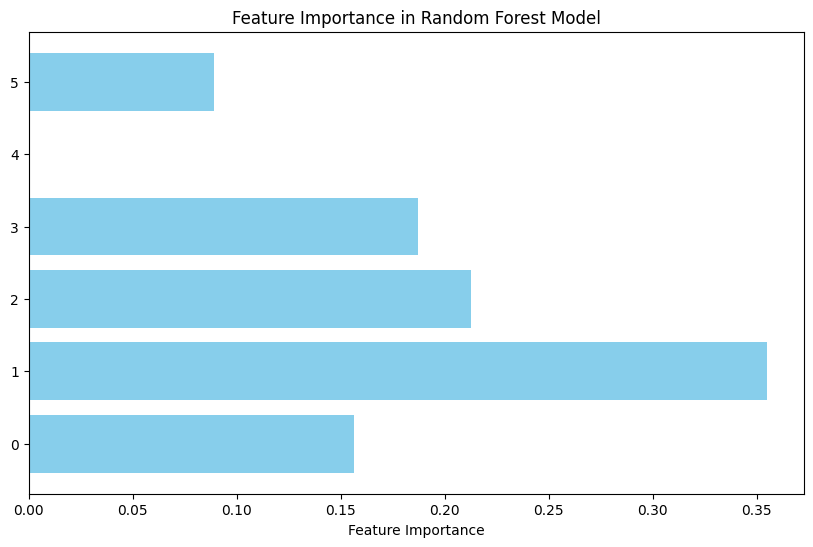

In [171]:
# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X_train_df.columns[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()

- Memory is the most importaant feature that the affect the price most.
- RAM is at the second postion that affects the pricing of the model.